# PythonÊï∞ÊçÆÂàÜÊûêËØæËÆæ‰ª£Á†ÅÁ¨¨3Áâà

In [17]:
# -*- coding: utf-8 -*-
"""
Ê†°Âõ≠Ê∂àË¥πË°å‰∏∫Ê®°ÊãüÊï∞ÊçÆÁîüÊàêÂô®ÔºàÂ¢ûÂº∫ÁúüÂÆûÁâàÔºâ
Â¢ûÂä†Â§öÁßçÊï∞ÊçÆÈóÆÈ¢òÔºöÁº∫Â§±ÂÄº„ÄÅÂºÇÂ∏∏ÂÄº„ÄÅÁâπÊÆäÂÄº
"""

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import os

# --------------------------
# 1. ÈÖçÁΩÆÂèÇÊï∞
# --------------------------
OUTPUT_DIR = "./data/raw"
os.makedirs(OUTPUT_DIR, exist_ok=True)
OUTPUT_FILE = os.path.join(OUTPUT_DIR, "student_behavior_raw.xlsx")

# Â≠¶ÁîüÁ±ªÂûãÂàÜÂ∏É
STUDENT_DIST = {"Â≠¶Èú∏Âûã": 0.2, "ÊôÆÈÄöÂûã": 0.6, "È£éÈô©Âûã": 0.2}
TOTAL_STUDENTS = 500
WEEKS = 16

# Êï∞ÊçÆÈóÆÈ¢òÊ¶ÇÁéáËÆæÁΩÆ
PROBLEM_PROBS = {
    "breakfast_missing": 0.10,  # Êó©È§êÁº∫Â§±Áéá
    "spending_missing": 0.02,   # Ê∂àË¥πÈáëÈ¢ùÁº∫Â§±Áéá
    "library_negative": 0.01,   # Âõæ‰π¶È¶ÜÊ¨°Êï∞Ë¥üÂÄºÈîôËØØ
    "score_extreme": 0.03,      # ÊàêÁª©ÊûÅÁ´ØÂÄº
    "dorm_unknown": 0.05        # ÂÆøËàçÂå∫Êú™Áü•
}

# Âü∫‰∫éÊñáÁåÆÁöÑÂèÇÊï∞ËÆæÁΩÆ
BEHAVIOR_PARAMS = {
    "Â≠¶Èú∏Âûã": {
        "breakfast_mu": 7.2, "breakfast_sigma": 0.8,
        "library_lambda": 7, "night_alpha": 1.8, "night_beta": 0.6
    },
    "ÊôÆÈÄöÂûã": {
        "breakfast_mu": 8.0, "breakfast_sigma": 1.5,
        "library_lambda": 4, "night_alpha": 3.2, "night_beta": 1.5
    },
    "È£éÈô©Âûã": {
        "breakfast_mu": 9.8, "breakfast_sigma": 2.2,
        "library_lambda": 1.5, "night_alpha": 4.5, "night_beta": 2.2
    }
}

# --------------------------
# 2. Êï∞ÊçÆÁîüÊàêÂáΩÊï∞
# --------------------------
def generate_student_data(student_type, student_id, start_date="2023-09-01"):
    params = BEHAVIOR_PARAMS[student_type]
    records = []
    base_date = datetime.strptime(start_date, "%Y-%m-%d")
    
    for week in range(WEEKS):
        # =====================
        # 1. Âü∫Á°ÄÊï∞ÊçÆÁîüÊàê
        # =====================
        # Êó©È§êÊó∂Èó¥ÔºàÂê´10%Áº∫Â§±Ê¶ÇÁéáÔºâ
        has_breakfast = np.random.random() > PROBLEM_PROBS["breakfast_missing"]
        breakfast_value = np.random.normal(
            params["breakfast_mu"], 
            params["breakfast_sigma"]
        )
        breakfast_hour = max(6.0, min(10.0, breakfast_value))
        breakfast_time_str = None
        
        if has_breakfast:
            breakfast_dt = base_date + timedelta(weeks=week, hours=breakfast_hour)
            breakfast_time_str = breakfast_dt.strftime("%H:%M:%S")
        
        # Âõæ‰π¶È¶ÜÊ¨°Êï∞ÔºàÊ≥äÊùæÂàÜÂ∏ÉÔºâ
        library_visits = np.random.poisson(params["library_lambda"])
        
        # Â§úÈó¥Ê∂àË¥πÔºà‰ºΩÈ©¨ÂàÜÂ∏ÉÔºâ
        night_spending = np.random.gamma(params["night_alpha"], params["night_beta"])
        
        # È£üÂ†ÇÊ∂àË¥πÔºàÂùáÂåÄÂàÜÂ∏ÉÔºâ
        canteen_spending = np.random.uniform(8, 15)
        
        # Â≠¶‰∏öÊàêÁª©ÔºàÂü∫‰∫éË°å‰∏∫Ôºâ
        base_score = 82 if student_type == "Â≠¶Èú∏Âûã" else 68 if student_type == "ÊôÆÈÄöÂûã" else 53
        score_variation = (
            (breakfast_hour - params["breakfast_mu"]) * 3 +
            (library_visits - params["library_lambda"]) * 1.5 +
            np.random.normal(0, 5)
        )
        score = max(30, min(100, base_score + score_variation))
        
        # ÂÆøËàçÂå∫Âüü
        dorm_area = np.random.choice(["AÂå∫", "BÂå∫", "CÂå∫"], p=[0.3, 0.5, 0.2])
        
        # =====================
        # 2. Ê≥®ÂÖ•Êï∞ÊçÆÈóÆÈ¢ò
        # =====================
        # Ê∂àË¥πÈáëÈ¢ùÁº∫Â§±Ôºà2%Ê¶ÇÁéáÔºâ
        if np.random.random() < PROBLEM_PROBS["spending_missing"]:
            # ÈöèÊú∫ÈÄâÊã©Áº∫Â§±Â≠óÊÆµ
            missing_field = np.random.choice(["night_spend", "canteen_spend"])
            if missing_field == "night_spend":
                night_spending = None
            else:
                canteen_spending = None
        
        # Âõæ‰π¶È¶ÜÊ¨°Êï∞Ë¥üÂÄºÔºà1%Ê¶ÇÁéáÔºâ
        if np.random.random() < PROBLEM_PROBS["library_negative"]:
            library_visits = -1  # Á≥ªÁªüÈîôËØØ‰ª£Á†Å
        
        # ÊàêÁª©ÊûÅÁ´ØÂÄºÔºà3%Ê¶ÇÁéáÔºâ
        if np.random.random() < PROBLEM_PROBS["score_extreme"]:
            # 0ÂàÜÔºàÁº∫ËÄÉÔºâÊàñË∂ÖËøá100ÂàÜÔºàÂΩïÂÖ•ÈîôËØØÔºâ
            score = 0 if np.random.random() < 0.7 else np.random.uniform(101, 120)
        
        # ÂÆøËàçÂå∫ÂüüÊú™Áü•Ôºà5%Ê¶ÇÁéáÔºâ
        if np.random.random() < PROBLEM_PROBS["dorm_unknown"]:
            dorm_area = "-1"  # Ë°®Á§∫Êú™Áü•
        
        # =====================
        # 3. Ê∑ªÂä†ÂºÇÂ∏∏ÂÄº
        # =====================
        # Ê∑ªÂä†5%ÁöÑÊûÅÁ´ØÊ∂àË¥πÂÄº
        if np.random.random() < 0.05:
            if night_spending is not None:
                night_spending *= np.random.choice([0.1, 5.0])
        
        records.append({
            "stu_id": f"S{student_id:04d}",
            "record_date": (base_date + timedelta(weeks=week)).strftime("%Y-%m-%d"),
            "student_type": student_type,
            "dorm_area": dorm_area,
            "breakfast_time": breakfast_time_str,
            "library_freq": library_visits,
            "night_spend": round(night_spending, 2) if night_spending is not None else None,
            "canteen_spend": round(canteen_spending, 2) if canteen_spending is not None else None,
            "weekly_score": round(score, 1)
        })
    
    return pd.DataFrame(records)

# --------------------------
# 3. ÁîüÊàêÂÆåÊï¥Êï∞ÊçÆÈõÜ
# --------------------------
all_students = []
student_count = 1

for st_type, proportion in STUDENT_DIST.items():
    num = int(TOTAL_STUDENTS * proportion)
    for i in range(num):
        df_student = generate_student_data(st_type, student_count)
        all_students.append(df_student)
        student_count += 1

raw_df = pd.concat(all_students, ignore_index=True)

# Ê∑ªÂä†ÊÄßÂà´Â≠óÊÆµÔºàÂê´1%Áº∫Â§±Ê¶ÇÁéáÔºâ
gender_options = ["Áî∑", "Â•≥", None]
gender_probs = [0.54, 0.45, 0.01]  # 1%Ê¶ÇÁéáÁº∫Â§±
raw_df["gender"] = np.random.choice(gender_options, size=len(raw_df), p=gender_probs)

# --------------------------
# 4. Êï∞ÊçÆÊ£ÄÊü•‰∏é‰øùÂ≠ò
# --------------------------
print("="*50)
print("Ê®°ÊãüÊï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØÔºö")
print("="*50)
print(f"Êï∞ÊçÆÈõÜÁª¥Â∫¶Ôºö{raw_df.shape}")
print("\nÂâç5Êù°Êï∞ÊçÆÁ§∫‰æãÔºö")
print(raw_df.head())

print("\nÂ≠óÊÆµÁªüËÆ°‰ø°ÊÅØÔºö")
print(raw_df.describe(include='all', datetime_is_numeric=True).fillna('-'))

print("\nÁº∫Â§±ÂÄºÁªüËÆ°Ôºö")
print(raw_df.isnull().sum())

print("\nÁâπÊÆäÂÄºÁªüËÆ°Ôºö")
print(f"Âõæ‰π¶È¶ÜË¥üÂÄºËÆ∞ÂΩïÔºö{(raw_df['library_freq'] < 0).sum()}")
print(f"ÂÆøËàçÊú™Áü•ËÆ∞ÂΩïÔºö{(raw_df['dorm_area'] == '-1').sum()}")
print(f"ÊûÅÁ´ØÊàêÁª©ËÆ∞ÂΩïÔºö{(raw_df['weekly_score'] == 0) | (raw_df['weekly_score'] > 100).sum()}")

# ‰øùÂ≠òÂéüÂßãÊï∞ÊçÆ
raw_df.to_excel(OUTPUT_FILE, index=False, sheet_name='RawData')
print(f"\nÊ®°ÊãüÊï∞ÊçÆÂ∑≤‰øùÂ≠òËá≥Ôºö{OUTPUT_FILE}")

Ê®°ÊãüÊï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØÔºö
Êï∞ÊçÆÈõÜÁª¥Â∫¶Ôºö(8000, 10)

Ââç5Êù°Êï∞ÊçÆÁ§∫‰æãÔºö
  stu_id record_date student_type dorm_area breakfast_time  library_freq  \
0  S0001  2023-09-01          Â≠¶Èú∏Âûã        BÂå∫       07:27:22             3   
1  S0001  2023-09-08          Â≠¶Èú∏Âûã        AÂå∫       07:23:31             8   
2  S0001  2023-09-15          Â≠¶Èú∏Âûã        CÂå∫       06:59:18             4   
3  S0001  2023-09-22          Â≠¶Èú∏Âûã        BÂå∫       06:05:33             5   
4  S0001  2023-09-29          Â≠¶Èú∏Âûã        BÂå∫       06:40:02             8   

   night_spend  canteen_spend  weekly_score gender  
0         0.61            NaN          80.6      Â•≥  
1         1.63          14.55          78.3      Â•≥  
2         0.92          11.74          80.7      Áî∑  
3         0.70            NaN          69.5      Â•≥  
4         0.40           9.06          75.0      Â•≥  

Â≠óÊÆµÁªüËÆ°‰ø°ÊÅØÔºö
       stu_id record_date student_type dorm_area breakfast_time library

In [18]:
# -*- coding: utf-8 -*-
"""
Ê†°Âõ≠Ê∂àË¥πË°å‰∏∫Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÁÆ°ÈÅìÔºàÊúÄÁªàÁâàÔºâ
ÂåÖÂê´Áº∫Â§±ÂÄºÂ§ÑÁêÜ„ÄÅÂºÇÂ∏∏ÂÄºÊ£ÄÊµã„ÄÅÁâπÂæÅÂ∑•Á®ãÁ≠âÂÆåÊï¥ÊµÅÁ®ã
"""

import pandas as pd
import numpy as np
# ÂêØÁî®ÂÆûÈ™åÊÄßÂäüËÉΩ‰ª•‰ΩøÁî®IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from scipy import stats
import os

# --------------------------
# 1. ÈÖçÁΩÆÂèÇÊï∞
# --------------------------
INPUT_FILE = "./data/raw/student_behavior_raw.xlsx"
OUTPUT_DIR = "./data/processed"
os.makedirs(OUTPUT_DIR, exist_ok=True)
OUTPUT_FILE = os.path.join(OUTPUT_DIR, "student_behavior_processed.xlsx")

# ÂÖ≥ÈîÆÂ≠óÊÆµÈÖçÁΩÆ
TIME_COLS = ["breakfast_time"]
NUMERIC_COLS = ["canteen_spend", "library_freq", "night_spend", "weekly_score"]
CATEGORICAL_COLS = ["dorm_area", "gender", "student_type"]

# --------------------------
# 2. Êï∞ÊçÆÂä†ËΩΩ
# --------------------------
print("="*50)
print("Âä†ËΩΩÂéüÂßãÊï∞ÊçÆ...")
print("="*50)
raw_df = pd.read_excel(
    INPUT_FILE,
    sheet_name='RawData',
    parse_dates=TIME_COLS
)

print("\nÂéüÂßãÊï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØÔºö")
print(f"Êï∞ÊçÆÈõÜÁª¥Â∫¶Ôºö{raw_df.shape}")
print("\nÂâç5Êù°Êï∞ÊçÆÔºö")
print(raw_df.head())

print("\nÂéüÂßãÊï∞ÊçÆÁªüËÆ°ÊèèËø∞Ôºö")
# Ê∑ªÂä† datetime_is_numeric=True ÈÅøÂÖçË≠¶Âëä
print(raw_df.describe(include='all', datetime_is_numeric=True).fillna('-'))

print("\nÂéüÂßãÊï∞ÊçÆÁº∫Â§±ÂÄºÁªüËÆ°Ôºö")
print(raw_df.isnull().sum())

# --------------------------
# 3. Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÂáΩÊï∞
# --------------------------
def preprocess_data(df):
    """ÂÆåÊï¥Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÊµÅÁ®ã"""
    df = df.copy()
    
    # 3.1 Áº∫Â§±ÂÄºÂ§ÑÁêÜ
    print("\n" + "="*50)
    print("ÂºÄÂßãÁº∫Â§±ÂÄºÂ§ÑÁêÜ...")
    
    # Êó∂Èó¥Â≠óÊÆµÔºöÂêëÂâçÂ°´ÂÖÖ
    for col in TIME_COLS:
        if col in df.columns:
            # ÂÖàÂ°´ÂÖÖÁº∫Â§±ÂÄºÂÜçËΩ¨Êç¢Á±ªÂûã
            df[col] = df[col].fillna(method='ffill')
            print(f"  - {col}Â≠óÊÆµÔºöÂêëÂâçÂ°´ÂÖÖÂÆåÊàê")
    
    # Êï∞ÂÄºÂ≠óÊÆµÔºöÂ§öÈáçÊèíË°•
    if NUMERIC_COLS:
        # ÂàõÂª∫IterativeImputerÂÆû‰æã
        imputer = IterativeImputer(max_iter=20, random_state=42)
        df[NUMERIC_COLS] = imputer.fit_transform(df[NUMERIC_COLS])
        print("  - Êï∞ÂÄºÂ≠óÊÆµÔºöÂ§öÈáçÊèíË°•ÂÆåÊàê")
    
    # ÂàÜÁ±ªÂ≠óÊÆµÔºö‰ºóÊï∞Â°´ÂÖÖ
    for col in CATEGORICAL_COLS:
        if col in df.columns:
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)
            print(f"  - {col}Â≠óÊÆµÔºö‰ºóÊï∞Â°´ÂÖÖ({mode_val})")
    
    # 3.2 ÂºÇÂ∏∏ÂÄºÂ§ÑÁêÜ
    print("\n" + "="*50)
    print("ÂºÄÂßãÂºÇÂ∏∏ÂÄºÊ£ÄÊµã‰∏éÂ§ÑÁêÜ...")
    
    # IQRÊñπÊ≥ïÂ§ÑÁêÜÊ∂àË¥πÈáëÈ¢ù
    for col in ['night_spend', 'canteen_spend']:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = max(0, q1 - 1.5 * iqr)  # Ê∂àË¥πÈáëÈ¢ù‰∏çËÉΩ‰∏∫Ë¥ü
        upper_bound = q3 + 1.5 * iqr
        
        # Áº©Â∞æÂ§ÑÁêÜÔºàWinsorizationÔºâ
        df[col] = df[col].clip(lower_bound, upper_bound)
        print(f"  - {col}Â≠óÊÆµÔºöIQRÁº©Â∞æÂ§ÑÁêÜÔºåËæπÁïå[{lower_bound:.2f}, {upper_bound:.2f}]")
    
    # Isolation ForestÊ£ÄÊµãÂ§öÂÖÉÂºÇÂ∏∏
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    outliers = iso_forest.fit_predict(df[NUMERIC_COLS])
    df = df[outliers == 1]  # ‰øùÁïôÈùûÂºÇÂ∏∏ÁÇπ
    print(f"  - Isolation ForestÊ£ÄÊµãÔºöÁßªÈô§{sum(outliers == -1)}Êù°ÂºÇÂ∏∏ËÆ∞ÂΩï")
    
    # 3.3 ÁâπÂæÅÂ∑•Á®ã
    print("\n" + "="*50)
    print("ÂºÄÂßãÁâπÂæÅÂ∑•Á®ã...")
    
    # Êó©È§êÊó∂Èó¥ÁâπÂæÅ - Á°Æ‰øùÂú®Áº∫Â§±ÂÄºÂ§ÑÁêÜÂêéÊâßË°å
    if 'breakfast_time' in df.columns:
        # Á°Æ‰øùÊó∂Èó¥Â≠óÊÆµÊòØdatetimeÁ±ªÂûã
        if not pd.api.types.is_datetime64_any_dtype(df['breakfast_time']):
            df['breakfast_time'] = pd.to_datetime(df['breakfast_time'])
        
        # ÊèêÂèñÂ∞èÊó∂
        df['breakfast_hour'] = df['breakfast_time'].dt.hour
        
        # Êó©È§êÁ®≥ÂÆöÊÄßÔºà3Âë®ÊªëÂä®Ê†áÂáÜÂ∑ÆÔºâ - ‰ΩøÁî®min_periodsÂ§ÑÁêÜÁº∫Â§±ÂÄº
        df['breakfast_std_3w'] = df.groupby('stu_id')['breakfast_hour'].transform(
            lambda x: x.rolling(3, min_periods=1).std())
        
        print("  - Êñ∞Â¢ûÊó©È§êÊó∂Èó¥ÁâπÂæÅ")
    
    # Ê∂àË¥πÊ®°ÂºèÁâπÂæÅ
    if {'canteen_spend', 'night_spend'}.issubset(df.columns):
        # Èò≤Ê≠¢Èô§Èõ∂ÈîôËØØ
        df['night_spend_ratio'] = df['night_spend'] / (df['canteen_spend'] + 1e-6)
        
        # Ê∂àË¥πÁÜµÂÄºÔºàË°å‰∏∫Â§öÊ†∑ÊÄßÔºâ - ‰ΩøÁî®applyÊó∂Â§ÑÁêÜÂèØËÉΩÁöÑNaN
        def calc_entropy(row):
            values = [row['canteen_spend'], row['night_spend']]
            if all(pd.notnull(v) for v in values):
                return stats.entropy(values, base=2)
            return np.nan
        
        df['spend_entropy'] = df.apply(calc_entropy, axis=1)
        print("  - Êñ∞Â¢ûÊ∂àË¥πÊ®°ÂºèÁâπÂæÅ")
    
    # Â≠¶‰∏öË°å‰∏∫ÂÖ≥ËÅîÁâπÂæÅ
    df['study_consume_corr'] = df['library_freq'] / (df['night_spend'] + 0.5)
    print("  - Êñ∞Â¢ûÂ≠¶‰∏ö-Ê∂àË¥πÂÖ≥ËÅîÁâπÂæÅ")
    
    # ÊúÄÁªàÊ£ÄÊü•ÔºöÁ°Æ‰øùÊ≤°ÊúâÁº∫Â§±ÂÄº
    df = df.dropna()
    print(f"  - ÊúÄÁªàÊï∞ÊçÆÊ∏ÖÊ¥óÔºöÁßªÈô§{len(df) - len(df.dropna())}Êù°Âê´Áº∫Â§±ÂÄºÁöÑËÆ∞ÂΩï")
    
    return df

# --------------------------
# 4. ÊâßË°åÈ¢ÑÂ§ÑÁêÜ
# --------------------------
processed_df = preprocess_data(raw_df)

# --------------------------
# 5. ÁªìÊûúÊ£ÄÊü•‰∏é‰øùÂ≠ò
# --------------------------
print("\n" + "="*50)
print("È¢ÑÂ§ÑÁêÜÂêéÊï∞ÊçÆÊ£ÄÊü•Ôºö")
print("="*50)
print(f"Â§ÑÁêÜÂêéÊï∞ÊçÆÈõÜÁª¥Â∫¶Ôºö{processed_df.shape}")
print("\nÂ§ÑÁêÜÂêéÂâç5Êù°Êï∞ÊçÆÔºö")
print(processed_df.head())

print("\nÂ§ÑÁêÜÂêéÁªüËÆ°ÊèèËø∞Ôºö")
# Ê∑ªÂä† datetime_is_numeric=True ÈÅøÂÖçË≠¶Âëä
print(processed_df.describe(include='all', datetime_is_numeric=True).fillna('-'))

print("\nÂ§ÑÁêÜÂêéÁº∫Â§±ÂÄºÁªüËÆ°Ôºö")
print(processed_df.isnull().sum())

# ‰øùÂ≠òÂ§ÑÁêÜÁªìÊûú
processed_df.to_excel(OUTPUT_FILE, index=False, sheet_name='ProcessedData')
print(f"\nÂ§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÂ∑≤‰øùÂ≠òËá≥Ôºö{OUTPUT_FILE}")

Âä†ËΩΩÂéüÂßãÊï∞ÊçÆ...

ÂéüÂßãÊï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØÔºö
Êï∞ÊçÆÈõÜÁª¥Â∫¶Ôºö(8000, 10)

Ââç5Êù°Êï∞ÊçÆÔºö
  stu_id record_date student_type dorm_area      breakfast_time  library_freq  \
0  S0001  2023-09-01          Â≠¶Èú∏Âûã        BÂå∫ 2025-06-08 07:27:22             3   
1  S0001  2023-09-08          Â≠¶Èú∏Âûã        AÂå∫ 2025-06-08 07:23:31             8   
2  S0001  2023-09-15          Â≠¶Èú∏Âûã        CÂå∫ 2025-06-08 06:59:18             4   
3  S0001  2023-09-22          Â≠¶Èú∏Âûã        BÂå∫ 2025-06-08 06:05:33             5   
4  S0001  2023-09-29          Â≠¶Èú∏Âûã        BÂå∫ 2025-06-08 06:40:02             8   

   night_spend  canteen_spend  weekly_score gender  
0         0.61            NaN          80.6      Â•≥  
1         1.63          14.55          78.3      Â•≥  
2         0.92          11.74          80.7      Áî∑  
3         0.70            NaN          69.5      Â•≥  
4         0.40           9.06          75.0      Â•≥  

ÂéüÂßãÊï∞ÊçÆÁªüËÆ°ÊèèËø∞Ôºö
       stu_id reco


Â§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÂ∑≤‰øùÂ≠òËá≥Ôºö./data/processed\student_behavior_processed.xlsx


In [19]:
#Êï∞ÊçÆÂàÜÊûêÂèäÂèØËßÜÂåñ

In [20]:
import os
print(os.getcwd())  # ÊòæÁ§∫ÂΩìÂâçÂ∑•‰ΩúÁõÆÂΩï--resovling data path problem.....hhh

C:\Users\86178\PythonHomework\221549210Èíü‰∫¨ËµõÂÆûÈ™å1


Êï∞ÊçÆÊ¶ÇËßàÔºö
Êï∞ÊçÆÈõÜÁª¥Â∫¶Ôºö(7100, 15)

Ââç5Êù°Êï∞ÊçÆÔºö


stu_id record_date student_type dorm_area      breakfast_time  library_freq  \
0  S0001  2023-09-08          Â≠¶Èú∏Âûã        AÂå∫ 2025-06-08 07:23:31             8   
1  S0001  2023-09-15          Â≠¶Èú∏Âûã        CÂå∫ 2025-06-08 06:59:18             4   
2  S0001  2023-09-22          Â≠¶Èú∏Âûã        BÂå∫ 2025-06-08 06:05:33             5   
3  S0001  2023-09-29          Â≠¶Èú∏Âûã        BÂå∫ 2025-06-08 06:40:02             8   
4  S0001  2023-10-06          Â≠¶Èú∏Âûã        CÂå∫ 2025-06-08 08:14:54            -1   

   night_spend  canteen_spend  weekly_score gender  breakfast_hour  \
0         1.63      14.550000          78.3      Â•≥               7   
1         0.92      11.740000          80.7      Áî∑               6   
2         0.70      11.497854          69.5      Â•≥               6   
3         0.40       9.060000          75.0      Â•≥               6   
4         1.82      14.800000          75.1      Â•≥               8   

   breakfast_std_3w  night_spend_ratio  spend_entropy  study_consume_corr  
0          0.000000           0.112027       0.471342            3.755869  
1          0.577350           0.078365       0.375809            2.816901  
2          0.577350           0.060881       0.316984            4.166667  
3          0.000000           0.044150       0.252665            8.888889  
4          1.154701           0.122973       0.498426           -0.431034


Êï∞ÊçÆÁ±ªÂûãÂíåÁº∫Â§±ÂÄºÊ£ÄÊü•Ôºö
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stu_id              7100 non-null   object        
 1   record_date         7100 non-null   object        
 2   student_type        7100 non-null   object        
 3   dorm_area           7100 non-null   object        
 4   breakfast_time      7100 non-null   datetime64[ns]
 5   library_freq        7100 non-null   int64         
 6   night_spend         7100 non-null   float64       
 7   canteen_spend       7100 non-null   float64       
 8   weekly_score        7100 non-null   float64       
 9   gender              7100 non-null   object        
 10  breakfast_hour      7100 non-null   int64         
 11  breakfast_std_3w    7100 non-null   float64       
 12  night_spend_ratio   7100 non-null   float64       
 13  spend_entropy

None


ÊèèËø∞ÊÄßÁªüËÆ°ÂàÜÊûê

Êï∞ÂÄºÂèòÈáèÊèèËø∞ÁªüËÆ°Ôºö


count       mean        std       min        25%  \
canteen_spend       7100.0  11.488244   1.992765  8.000000   9.770000   
library_freq        7100.0   4.026901   2.568456 -1.000000   2.000000   
night_spend         7100.0   4.897904   3.763457  0.020000   1.900000   
weekly_score        7100.0  67.527803  12.124577  0.000000  59.700000   
breakfast_hour      7100.0   7.682394   1.372090  6.000000   7.000000   
breakfast_std_3w    7100.0   0.973432   0.627011  0.000000   0.577350   
night_spend_ratio   7100.0   0.439962   0.350763  0.001709   0.164518   
spend_entropy       7100.0   0.743609   0.256435  0.018151   0.587570   
study_consume_corr  7100.0   1.746912   2.522976 -1.369863   0.311850   

                          50%        75%         max  
canteen_spend       11.496970  13.200000   15.000000  
library_freq         4.000000   6.000000   14.000000  
night_spend          4.130000   6.952500   14.981250  
weekly_score        68.000000  75.600000  119.800000  
breakfast_hour       7.000000   9.000000   10.000000  
breakfast_std_3w     1.000000   1.527525    2.828427  
night_spend_ratio    0.362732   0.627292    1.851823  
spend_entropy        0.835929   0.959791    1.000000  
study_consume_corr   0.790514   1.928906   21.818182


ÂàÜÁ±ªÂèòÈáèÁªüËÆ°Ôºö

student_typeÂàÜÂ∏ÉÔºö


ÊôÆÈÄöÂûã    0.611549
Â≠¶Èú∏Âûã    0.195493
È£éÈô©Âûã    0.192958
Name: student_type, dtype: float64


dorm_areaÂàÜÂ∏ÉÔºö


BÂå∫    0.465211
AÂå∫    0.290563
CÂå∫    0.193521
-1    0.050704
Name: dorm_area, dtype: float64


genderÂàÜÂ∏ÉÔºö


Áî∑    0.55831
Â•≥    0.44169
Name: gender, dtype: float64


Êï∞ÊçÆÂèØËßÜÂåñÂàÜÊûê


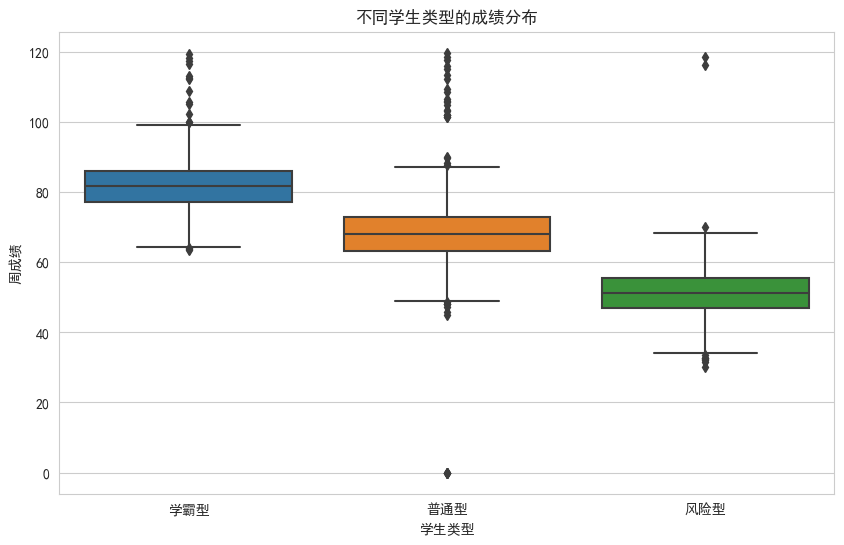

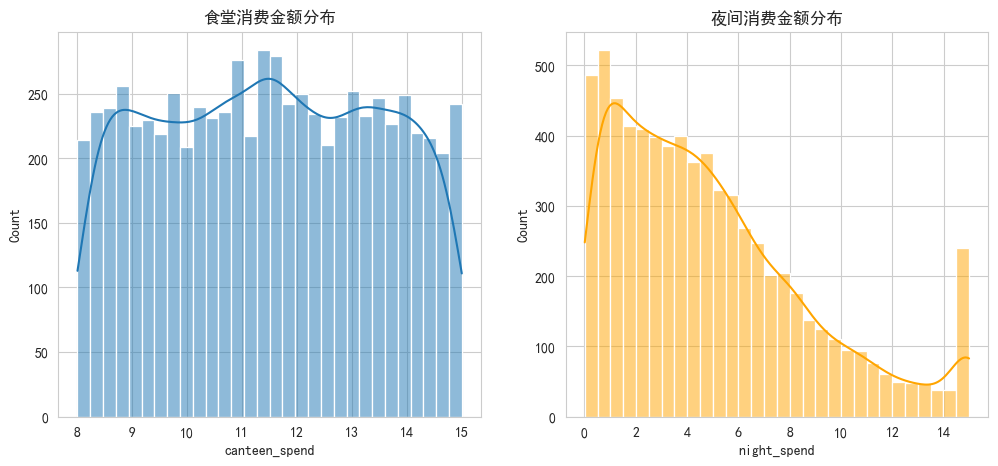

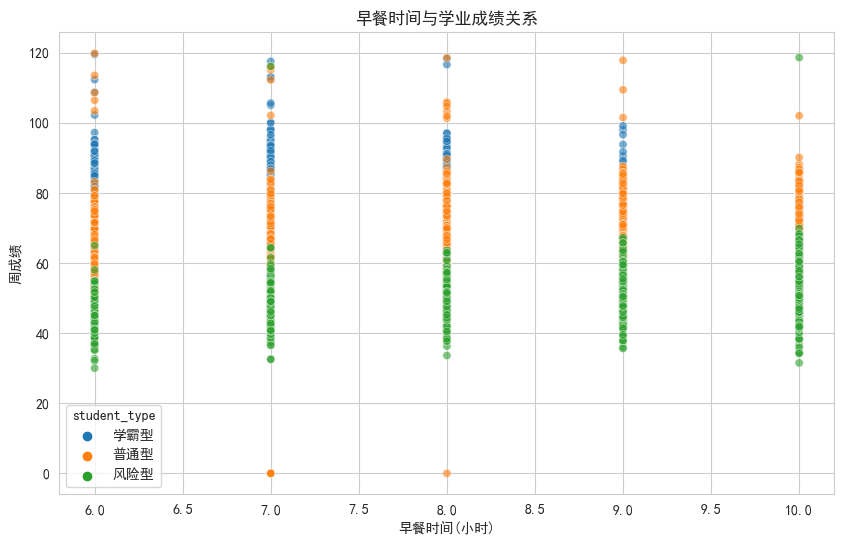

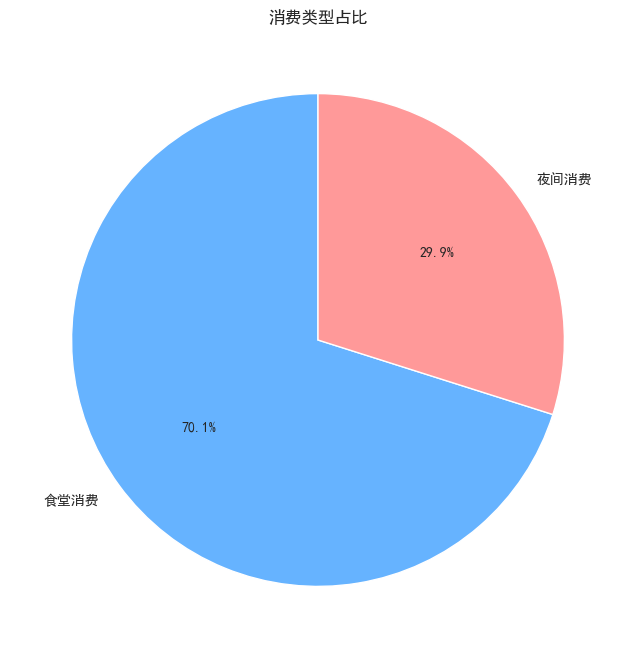

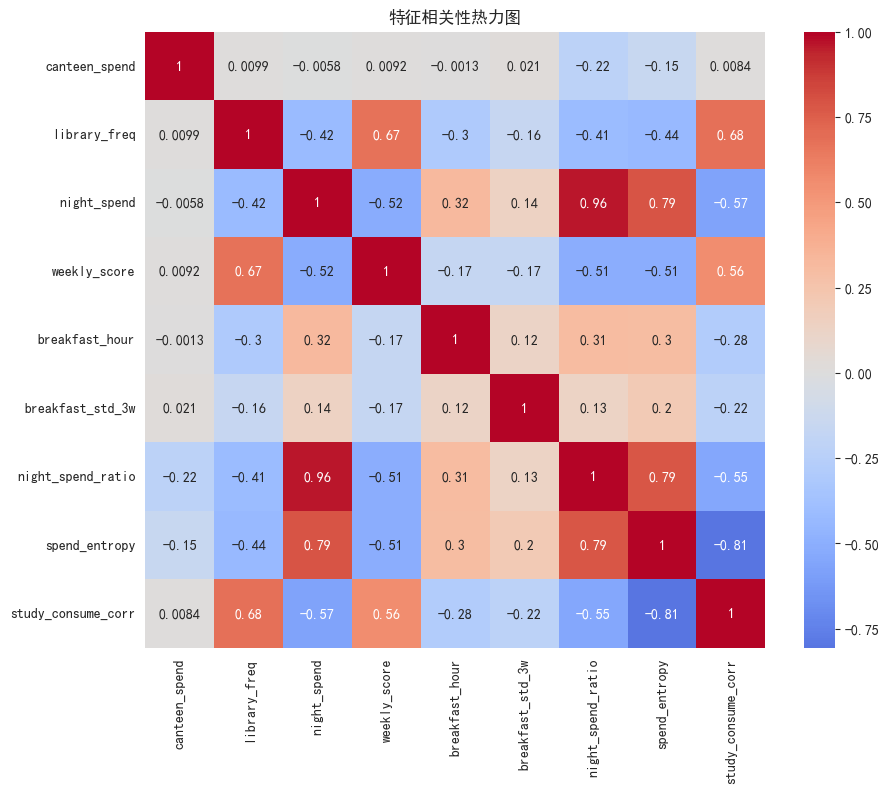


Â≠¶‰∏öÈ¢ÑË≠¶‰∏éË°å‰∏∫Êé®Ëçê

Â≠¶‰∏öÈ¢ÑË≠¶(ÊàêÁª©Âêé15%)ÔºöÂÖ±199ÂêçÂ≠¶Áîü
Á§∫‰æãÈ¢ÑË≠¶Ê∂àÊÅØÔºö
ÂêåÂ≠¶ S0469ÔºöÊÇ®ËøëÊúüÁöÑÂ≠¶‰∏öÊàêÁª©‰∏çÂ§™ÁêÜÊÉ≥ÔºåË¶ÅÂä™ÂäõÂä†Ê≤πÂëÄÔºÅ
ÂêåÂ≠¶ S0148ÔºöÊÇ®ËøëÊúüÁöÑÂ≠¶‰∏öÊàêÁª©‰∏çÂ§™ÁêÜÊÉ≥ÔºåË¶ÅÂä™ÂäõÂä†Ê≤πÂëÄÔºÅ
ÂêåÂ≠¶ S0461ÔºöÊÇ®ËøëÊúüÁöÑÂ≠¶‰∏öÊàêÁª©‰∏çÂ§™ÁêÜÊÉ≥ÔºåË¶ÅÂä™ÂäõÂä†Ê≤πÂëÄÔºÅ

Â≠¶‰π†Âº∫Â∫¶ÊèêÁ§∫(Âõæ‰π¶È¶ÜÂâç10%)ÔºöÂÖ±264ÂêçÂ≠¶Áîü
Á§∫‰æãÊèêÁ§∫Ê∂àÊÅØÔºö
ÂêåÂ≠¶ S0199ÔºöÂ≠¶‰π†‰πã‰Ωô‰πüË¶ÅÊ≥®ÊÑè‰ºëÊÅØÂì¶ÔºÅ
ÂêåÂ≠¶ S0386ÔºöÂ≠¶‰π†‰πã‰Ωô‰πüË¶ÅÊ≥®ÊÑè‰ºëÊÅØÂì¶ÔºÅ
ÂêåÂ≠¶ S0357ÔºöÂ≠¶‰π†‰πã‰Ωô‰πüË¶ÅÊ≥®ÊÑè‰ºëÊÅØÂì¶ÔºÅ

Ê∂àË¥πÊèêÁ§∫(È£üÂ†ÇÊ∂àË¥πÂâç5%)ÔºöÂÖ±258ÂêçÂ≠¶Áîü
Á§∫‰æãÊèêÁ§∫Ê∂àÊÅØÔºö
ÂêåÂ≠¶ S0005ÔºöÁæéÈ£üËôΩËÉΩËÆ©‰∫∫ÂøòÂç¥ÁÉ¶ÊÅºÔºå‰πüË¶ÅÊ≥®ÊÑè‰∏çË¶ÅÊö¥È•ÆÊö¥È£üÂì¶ÔºÅ
ÂêåÂ≠¶ S0129ÔºöÁæéÈ£üËôΩËÉΩËÆ©‰∫∫ÂøòÂç¥ÁÉ¶ÊÅºÔºå‰πüË¶ÅÊ≥®ÊÑè‰∏çË¶ÅÊö¥È•ÆÊö¥È£üÂì¶ÔºÅ
ÂêåÂ≠¶ S0106ÔºöÁæéÈ£üËôΩËÉΩËÆ©‰∫∫ÂøòÂç¥ÁÉ¶ÊÅºÔºå‰πüË¶ÅÊ≥®ÊÑè‰∏çË¶ÅÊö¥È•ÆÊö¥È£üÂì¶ÔºÅ

Â≠¶ÁîüÊàêÁª©Ë∂ãÂäøÂàÜÊûê


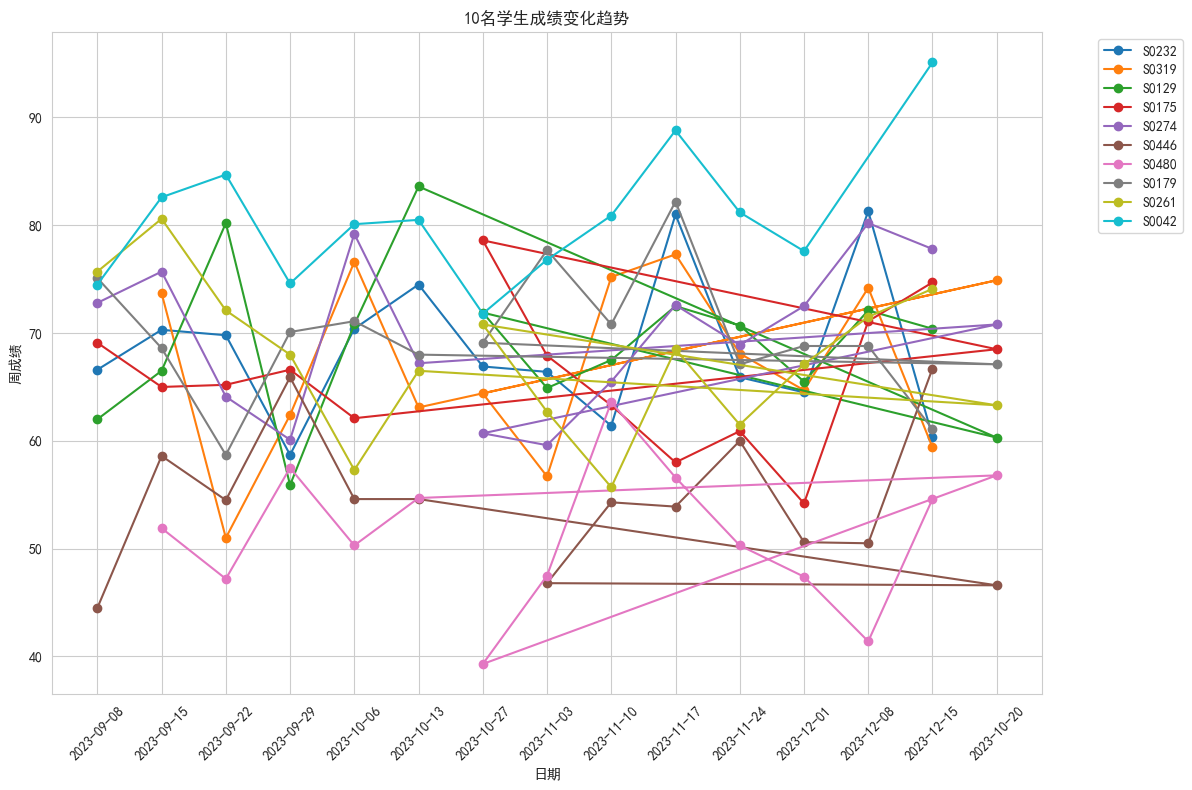


Â≠¶ÁîüË°å‰∏∫ËÅöÁ±ªÂàÜÊûê


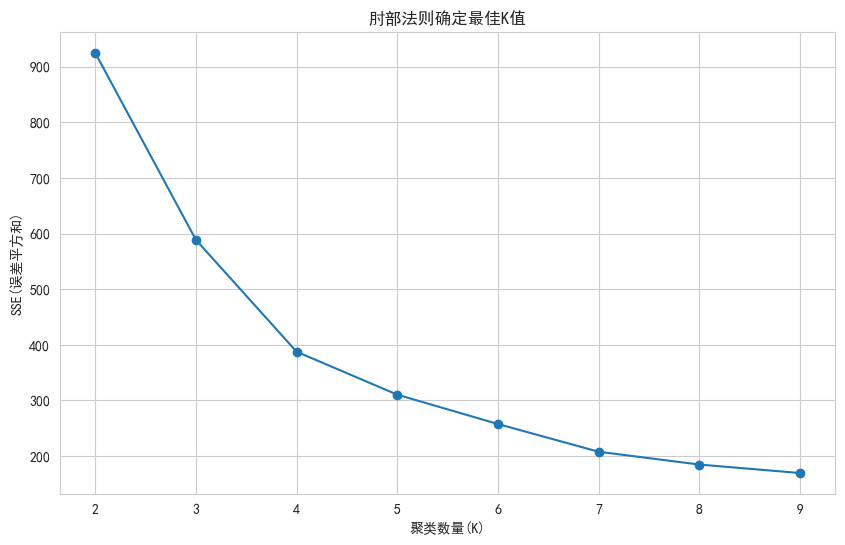


ËÅöÁ±ªËΩÆÂªìÁ≥ªÊï∞Ôºö0.435


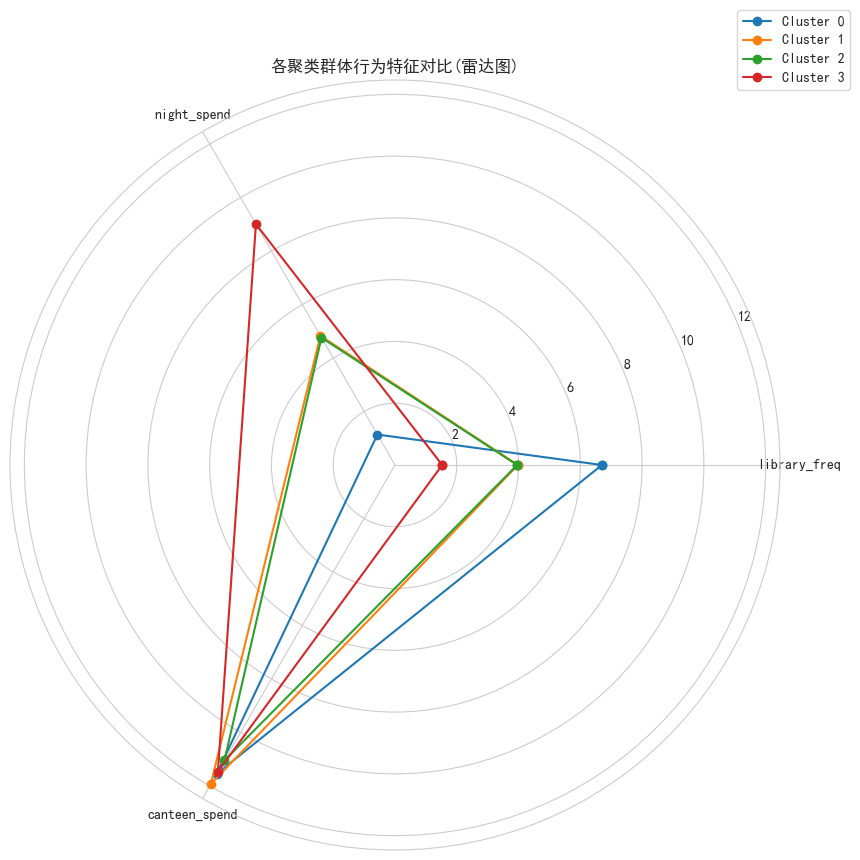


ÂêÑËÅöÁ±ªÁæ§‰ΩìÁâπÂæÅÊèèËø∞Ôºö


library_freq  night_spend  canteen_spend
cluster                                          
0            6.699945     1.138901      11.547533
1            3.980315     4.831285      11.926297
2            3.955153     4.761639      11.044032
3            1.528415     9.006022      11.466115

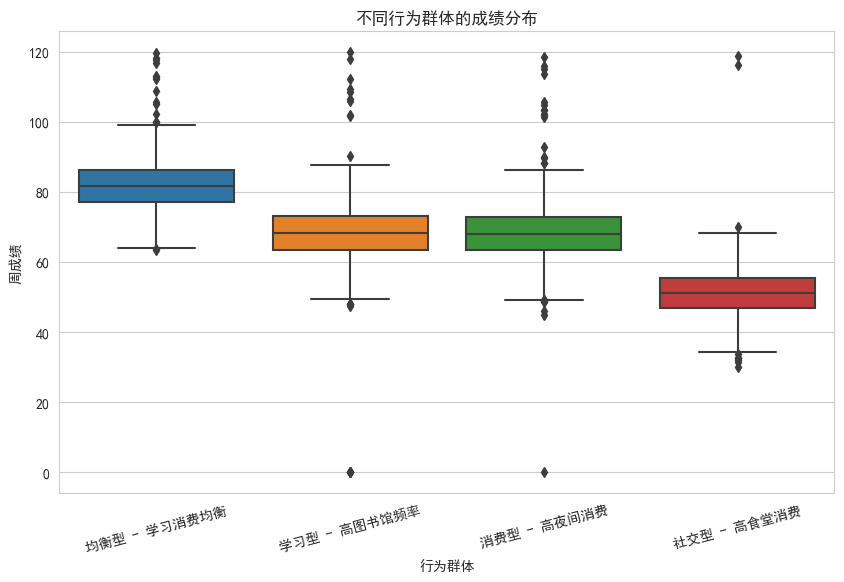


Â≠¶ÁîüÊàêÈïøËΩ®ËøπÂàÜÊûê


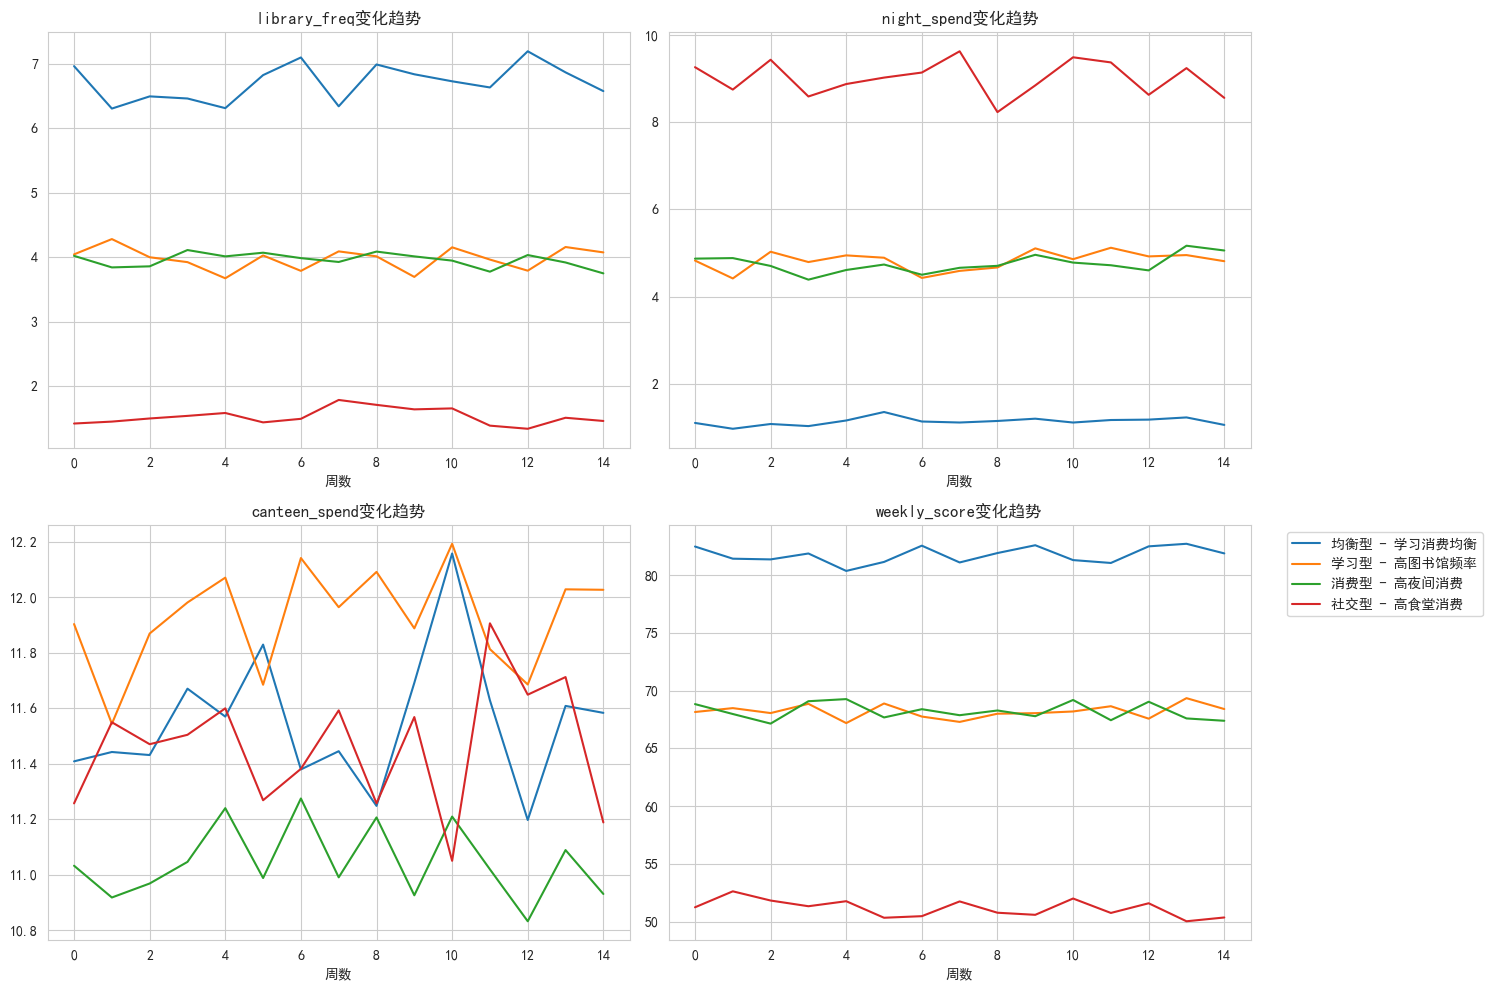


ÂàÜÊûêÂÆåÊàêÔºÅÂ∏¶ÊúâËÅöÁ±ªÊ†áÁ≠æÁöÑÊï∞ÊçÆÂ∑≤‰øùÂ≠ò„ÄÇ
üìä SVDÂ≠¶‰π†ËµÑÊ∫êÊé®ËçêÔºàÊñ∞ËÆ∞ÂΩïËß£ÂÜ≥Êé®Ëçê‰∫∫Âá∫Áé∞ÈáçÂ§çÊï∞ÊçÆÈóÆÈ¢òÔºâ

üîç Â≠¶Èú∏ÂûãÂ≠¶ÁîüÊé®ËçêÁ§∫‰æãÔºàÈöèÊú∫5ÂêçÔºâ:


stu_id  weekly_score recommended_resource
1192  S0086          85.9                 Â≠¶‰π†Â∞èÁªÑ
124   S0009          81.2                 Â≠¶‰π†Â∞èÁªÑ
358   S0026          79.6                 Â≠¶‰π†Â∞èÁªÑ
180   S0013          80.5                 Â≠¶‰π†Â∞èÁªÑ
487   S0035          87.7                 Â≠¶‰π†Â∞èÁªÑ


üîç ÊôÆÈÄöÂûãÂ≠¶ÁîüÊé®ËçêÁ§∫‰æãÔºàÈöèÊú∫5ÂêçÔºâ:


stu_id  weekly_score recommended_resource
2978  S0210          77.2                 Â≠¶‰π†Â∞èÁªÑ
3718  S0261          74.1                 Âú®Á∫øÊµãÈ™å
2673  S0189          64.5                 ËßÜÈ¢ëËØæÁ®ã
4942  S0346          60.6                 Âú®Á∫øÊµãÈ™å
3412  S0240          70.3                 Âú®Á∫øÊµãÈ™å


üîç È£éÈô©ÂûãÂ≠¶ÁîüÊé®ËçêÁ§∫‰æãÔºàÈöèÊú∫5ÂêçÔºâ:


stu_id  weekly_score recommended_resource
6972  S0491          36.3                 ËßÜÈ¢ëËØæÁ®ã
6039  S0423          57.3                 ËßÜÈ¢ëËØæÁ®ã
6915  S0487          45.4                 ËßÜÈ¢ëËØæÁ®ã
6381  S0448          54.0                 ËßÜÈ¢ëËØæÁ®ã
6720  S0473          47.6                 ËßÜÈ¢ëËØæÁ®ã

ÂõæÁâáÂ∑≤‰øùÂ≠òËá≥: ./data/visualization/SVD_Recommend.png


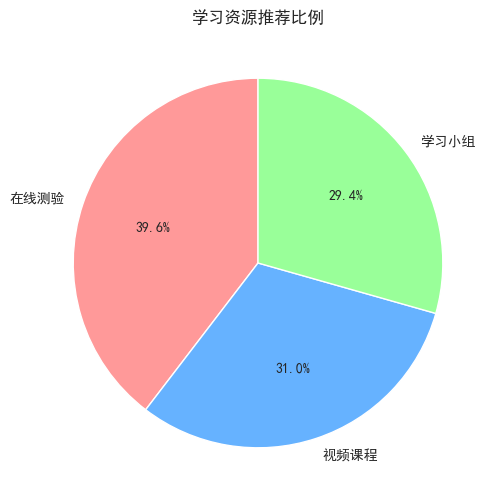

KNNÂêå‰º¥Êé®ËçêÁªìÊûúÂ±ïÁ§∫

Â≠¶Èú∏ÂûãÂ≠¶ÁîüÊé®ËçêÁ§∫‰æãÔºàÈöèÊú∫3ÂêçÔºâ:

Â≠¶ÁîüID: S0064
Âë®ÊàêÁª©: 79.0
Êé®ËçêÂêå‰º¥:
 - S0055 (Â≠¶Èú∏Âûã, ÊàêÁª©: 78.1)
 - S0095 (Â≠¶Èú∏Âûã, ÊàêÁª©: 88.0)
 - S0036 (Â≠¶Èú∏Âûã, ÊàêÁª©: 65.4)
 - S0027 (Â≠¶Èú∏Âûã, ÊàêÁª©: 89.8)

Â≠¶ÁîüID: S0035
Âë®ÊàêÁª©: 87.7
Êé®ËçêÂêå‰º¥:
 - S0003 (Â≠¶Èú∏Âûã, ÊàêÁª©: 74.4)
 - S0058 (Â≠¶Èú∏Âûã, ÊàêÁª©: 77.4)
 - S0036 (Â≠¶Èú∏Âûã, ÊàêÁª©: 65.4)
 - S0015 (Â≠¶Èú∏Âûã, ÊàêÁª©: 76.9)

Â≠¶ÁîüID: S0011
Âë®ÊàêÁª©: 78.1
Êé®ËçêÂêå‰º¥:
 - S0022 (Â≠¶Èú∏Âûã, ÊàêÁª©: 79.2)
 - S0080 (Â≠¶Èú∏Âûã, ÊàêÁª©: 77.3)
 - S0076 (Â≠¶Èú∏Âûã, ÊàêÁª©: 82.4)
 - S0058 (Â≠¶Èú∏Âûã, ÊàêÁª©: 77.4)

ÊôÆÈÄöÂûãÂ≠¶ÁîüÊé®ËçêÁ§∫‰æãÔºàÈöèÊú∫3ÂêçÔºâ:

Â≠¶ÁîüID: S0219
Âë®ÊàêÁª©: 70.8
Êé®ËçêÂêå‰º¥:
 - S0358 (ÊôÆÈÄöÂûã, ÊàêÁª©: 72.4)
 - S0301 (ÊôÆÈÄöÂûã, ÊàêÁª©: 73.9)
 - S0254 (ÊôÆÈÄöÂûã, ÊàêÁª©: 73.1)
 - S0164 (ÊôÆÈÄöÂûã, ÊàêÁª©: 68.0)

Â≠¶ÁîüID: S0355
Âë®ÊàêÁª©: 73.2
Êé®ËçêÂêå‰º¥:
 - S0393 (ÊôÆÈÄöÂûã, ÊàêÁª©: 67.7)
 - S0389 (ÊôÆÈÄöÂûã, ÊàêÁª©: 58.8)
 - S0206 (ÊôÆÈÄ

In [21]:
# -*- coding: utf-8 -*-
"""
Ê†°Âõ≠Ê∂àË¥πË°å‰∏∫Êï∞ÊçÆÂàÜÊûê‰∏éÂèØËßÜÂåñ
ÂåÖÂê´ÔºöÊèèËø∞ÊÄßÁªüËÆ°„ÄÅÂ≠¶‰∏öÈ¢ÑË≠¶„ÄÅË°å‰∏∫ËÅöÁ±ª„ÄÅÊàêÈïøËΩ®ËøπÂàÜÊûêÁ≠â
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÂíåÊ†∑Âºè
plt.rcParams['font.sans-serif'] = ['SimSun-']  # Áî®Êù•Ê≠£Â∏∏ÊòæÁ§∫‰∏≠ÊñáÊ†áÁ≠æ
plt.rcParams['axes.unicode_minus'] = False  # Áî®Êù•Ê≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑
sns.set_style('whitegrid')

# --------------------------
# 1. Êï∞ÊçÆÂä†ËΩΩ‰∏éÈ¢ÑÂ§ÑÁêÜÊ£ÄÊü•
# --------------------------
# ‰ªéÈ¢ÑÂ§ÑÁêÜÂêéÁöÑÊñá‰ª∂Âä†ËΩΩÊï∞ÊçÆ
df = pd.read_excel('./data/processed/student_behavior_processed.xlsx', 
                   sheet_name='ProcessedData')

print("Êï∞ÊçÆÊ¶ÇËßàÔºö")
print(f"Êï∞ÊçÆÈõÜÁª¥Â∫¶Ôºö{df.shape}")
print("\nÂâç5Êù°Êï∞ÊçÆÔºö")
display(df.head())

# Ê£ÄÊü•Êï∞ÊçÆÁ±ªÂûãÂíåÁº∫Â§±ÂÄº
print("\nÊï∞ÊçÆÁ±ªÂûãÂíåÁº∫Â§±ÂÄºÊ£ÄÊü•Ôºö")
display(df.info())

# --------------------------
# 2. ÊèèËø∞ÊÄßÁªüËÆ°ÂàÜÊûê
# --------------------------
print("\n" + "="*50)
print("ÊèèËø∞ÊÄßÁªüËÆ°ÂàÜÊûê")
print("="*50)

# 2.1 Êï∞ÂÄºÂûãÂèòÈáèÁªüËÆ°
num_cols = ['canteen_spend', 'library_freq', 'night_spend', 'weekly_score', 
            'breakfast_hour', 'breakfast_std_3w', 'night_spend_ratio', 
            'spend_entropy', 'study_consume_corr']

print("\nÊï∞ÂÄºÂèòÈáèÊèèËø∞ÁªüËÆ°Ôºö")
display(df[num_cols].describe().T)

# 2.2 ÂàÜÁ±ªÂèòÈáèÁªüËÆ°
cat_cols = ['student_type', 'dorm_area', 'gender']
print("\nÂàÜÁ±ªÂèòÈáèÁªüËÆ°Ôºö")
for col in cat_cols:
    print(f"\n{col}ÂàÜÂ∏ÉÔºö")
    display(df[col].value_counts(normalize=True))

# --------------------------
# 3. Êï∞ÊçÆÂèØËßÜÂåñÂàÜÊûê
# --------------------------
print("\n" + "="*50)
print("Êï∞ÊçÆÂèØËßÜÂåñÂàÜÊûê")
print("="*50)
# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì‰∏∫SimHeiÔºàÈªë‰ΩìÔºâ
plt.rcParams['font.sans-serif'] = ['SimHei']
# Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò
plt.rcParams['axes.unicode_minus'] = False

# 3.1 Â≠¶ÁîüÁ±ªÂûã‰∏éÊàêÁª©ÂÖ≥Á≥ª - ÁÆ±Á∫øÂõæ
plt.figure(figsize=(10, 6))
sns.boxplot(x='student_type', y='weekly_score', data=df, order=['Â≠¶Èú∏Âûã', 'ÊôÆÈÄöÂûã', 'È£éÈô©Âûã'])
plt.title('‰∏çÂêåÂ≠¶ÁîüÁ±ªÂûãÁöÑÊàêÁª©ÂàÜÂ∏É')
plt.xlabel('Â≠¶ÁîüÁ±ªÂûã')
plt.ylabel('Âë®ÊàêÁª©')
plt.savefig('./data/visualization/student_type_score.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.2 Ê∂àË¥πÈáëÈ¢ùÂàÜÂ∏É - Áõ¥ÊñπÂõæ
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['canteen_spend'], bins=30, kde=True)
plt.title('È£üÂ†ÇÊ∂àË¥πÈáëÈ¢ùÂàÜÂ∏É')

plt.subplot(1, 2, 2)
sns.histplot(df['night_spend'], bins=30, kde=True, color='orange')
plt.title('Â§úÈó¥Ê∂àË¥πÈáëÈ¢ùÂàÜÂ∏É')
plt.savefig('./data/visualization/spending_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.3 Êó©È§êÊó∂Èó¥‰∏éÊàêÁª©ÂÖ≥Á≥ª - Êï£ÁÇπÂõæ
plt.figure(figsize=(10, 6))
sns.scatterplot(x='breakfast_hour', y='weekly_score', hue='student_type', data=df, alpha=0.6)
plt.title('Êó©È§êÊó∂Èó¥‰∏éÂ≠¶‰∏öÊàêÁª©ÂÖ≥Á≥ª')
plt.xlabel('Êó©È§êÊó∂Èó¥(Â∞èÊó∂)')
plt.ylabel('Âë®ÊàêÁª©')
plt.savefig('./data/visualization/breakfast_score.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.4 Ê∂àË¥πÊ®°ÂºèÂç†ÊØî - È•ºÂõæ
plt.figure(figsize=(8, 8))
spend_ratio = df[['canteen_spend', 'night_spend']].mean()
plt.pie(spend_ratio, labels=['È£üÂ†ÇÊ∂àË¥π', 'Â§úÈó¥Ê∂àË¥π'], autopct='%1.1f%%', 
        colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Ê∂àË¥πÁ±ªÂûãÂç†ÊØî')
plt.savefig('./data/visualization/spending_pie.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.5 ÁâπÂæÅÁõ∏ÂÖ≥ÊÄß - ÁÉ≠ÂäõÂõæ
plt.figure(figsize=(10, 8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÁÉ≠ÂäõÂõæ')
plt.savefig('./data/visualization/feature_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

# --------------------------
# 4. Â≠¶‰∏öÈ¢ÑË≠¶‰∏éË°å‰∏∫Êé®Ëçê
# --------------------------
print("\n" + "="*50)
print("Â≠¶‰∏öÈ¢ÑË≠¶‰∏éË°å‰∏∫Êé®Ëçê")
print("="*50)

# 4.1 Â≠¶‰∏öÈ¢ÑË≠¶ - ÊàêÁª©Âêé15%ÁöÑÂ≠¶Áîü
score_threshold = df['weekly_score'].quantile(0.15)
low_score_students = df[df['weekly_score'] <= score_threshold]['stu_id'].unique()

print(f"\nÂ≠¶‰∏öÈ¢ÑË≠¶(ÊàêÁª©Âêé15%)ÔºöÂÖ±{len(low_score_students)}ÂêçÂ≠¶Áîü")
print("Á§∫‰æãÈ¢ÑË≠¶Ê∂àÊÅØÔºö")
for stu_id in np.random.choice(low_score_students, size=3, replace=False):
    print(f"ÂêåÂ≠¶ {stu_id}ÔºöÊÇ®ËøëÊúüÁöÑÂ≠¶‰∏öÊàêÁª©‰∏çÂ§™ÁêÜÊÉ≥ÔºåË¶ÅÂä™ÂäõÂä†Ê≤πÂëÄÔºÅ")

# 4.2 Â≠¶‰π†Âº∫Â∫¶ÊèêÁ§∫ - Âõæ‰π¶È¶ÜÊ¨°Êï∞Ââç10%ÁöÑÂ≠¶Áîü
library_threshold = df['library_freq'].quantile(0.9)
high_library_students = df[df['library_freq'] >= library_threshold]['stu_id'].unique()

print(f"\nÂ≠¶‰π†Âº∫Â∫¶ÊèêÁ§∫(Âõæ‰π¶È¶ÜÂâç10%)ÔºöÂÖ±{len(high_library_students)}ÂêçÂ≠¶Áîü")
print("Á§∫‰æãÊèêÁ§∫Ê∂àÊÅØÔºö")
for stu_id in np.random.choice(high_library_students, size=3, replace=False):
    print(f"ÂêåÂ≠¶ {stu_id}ÔºöÂ≠¶‰π†‰πã‰Ωô‰πüË¶ÅÊ≥®ÊÑè‰ºëÊÅØÂì¶ÔºÅ")

# 4.3 Ê∂àË¥πÊèêÁ§∫ - È£üÂ†ÇÊ∂àË¥πÂâç5%ÁöÑÂ≠¶Áîü
canteen_threshold = df['canteen_spend'].quantile(0.95)
high_canteen_students = df[df['canteen_spend'] >= canteen_threshold]['stu_id'].unique()

print(f"\nÊ∂àË¥πÊèêÁ§∫(È£üÂ†ÇÊ∂àË¥πÂâç5%)ÔºöÂÖ±{len(high_canteen_students)}ÂêçÂ≠¶Áîü")
print("Á§∫‰æãÊèêÁ§∫Ê∂àÊÅØÔºö")
for stu_id in np.random.choice(high_canteen_students, size=3, replace=False):
    print(f"ÂêåÂ≠¶ {stu_id}ÔºöÁæéÈ£üËôΩËÉΩËÆ©‰∫∫ÂøòÂç¥ÁÉ¶ÊÅºÔºå‰πüË¶ÅÊ≥®ÊÑè‰∏çË¶ÅÊö¥È•ÆÊö¥È£üÂì¶ÔºÅ")

# --------------------------
# 5. Â≠¶ÁîüÊàêÁª©Ë∂ãÂäøÂàÜÊûê
# --------------------------
print("\n" + "="*50)
print("Â≠¶ÁîüÊàêÁª©Ë∂ãÂäøÂàÜÊûê")
print("="*50)

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì‰∏∫SimHeiÔºàÈªë‰ΩìÔºâ
plt.rcParams['font.sans-serif'] = ['SimHei']
# Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò
plt.rcParams['axes.unicode_minus'] = False

# ÈöèÊú∫ÈÄâÊã©10ÂêçÂ≠¶Áîü
sample_students = np.random.choice(df['stu_id'].unique(), size=10, replace=False)
sample_data = df[df['stu_id'].isin(sample_students)]


# ÁªòÂà∂ÊàêÁª©ÂèòÂåñË∂ãÂäø
plt.figure(figsize=(12, 8))
for stu_id in sample_students:
    stu_data = sample_data[sample_data['stu_id'] == stu_id]
    plt.plot(stu_data['record_date'], stu_data['weekly_score'], 
             label=stu_id, marker='o')

plt.title('10ÂêçÂ≠¶ÁîüÊàêÁª©ÂèòÂåñË∂ãÂäø')
plt.xlabel('Êó•Êúü')
plt.ylabel('Âë®ÊàêÁª©')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('./data/visualization/score_trend.png', dpi=300, bbox_inches='tight')
plt.show()

# --------------------------
# 6. Â≠¶ÁîüË°å‰∏∫ËÅöÁ±ªÂàÜÊûê
# --------------------------
print("\n" + "="*50)
print("Â≠¶ÁîüË°å‰∏∫ËÅöÁ±ªÂàÜÊûê")
print("="*50)

# 6.1 ÂáÜÂ§áËÅöÁ±ªÁâπÂæÅ
cluster_features = ['library_freq', 'night_spend', 'canteen_spend']
cluster_data = df.groupby('stu_id')[cluster_features].mean()

# Ê†áÂáÜÂåñÊï∞ÊçÆ
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# 6.2 ‰ΩøÁî®ËÇòÈÉ®Ê≥ïÂàôÁ°ÆÂÆöÊúÄ‰Ω≥KÂÄº
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('ËÅöÁ±ªÊï∞Èáè(K)')
plt.ylabel('SSE(ËØØÂ∑ÆÂπ≥ÊñπÂíå)')
plt.title('ËÇòÈÉ®Ê≥ïÂàôÁ°ÆÂÆöÊúÄ‰Ω≥KÂÄº')
plt.savefig('./data/visualization/elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()

# 6.3 Ê†πÊçÆËÇòÈÉ®Ê≥ïÂàôÈÄâÊã©K=4ËøõË°åËÅöÁ±ª
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# ËÆ°ÁÆóËΩÆÂªìÁ≥ªÊï∞
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"\nËÅöÁ±ªËΩÆÂªìÁ≥ªÊï∞Ôºö{silhouette_avg:.3f}")

# Ê∑ªÂä†ËÅöÁ±ªÊ†áÁ≠æÂà∞Êï∞ÊçÆ
cluster_data['cluster'] = cluster_labels

# 6.4 ËÅöÁ±ªÁªìÊûúÂèØËßÜÂåñ
# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì‰∏∫SimHeiÔºàÈªë‰ΩìÔºâ
plt.rcParams['font.sans-serif'] = ['SimHei']
# Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò
plt.rcParams['axes.unicode_minus'] = False
# ÂêÑËÅöÁ±ª‰∏≠ÂøÉÁâπÂæÅÂØπÊØî - Èõ∑ËææÂõæ
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
angles = np.linspace(0, 2*np.pi, len(cluster_features), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Èó≠Âêà

plt.figure(figsize=(10, 10))
for i in range(best_k):
    values = np.concatenate((cluster_centers[i], [cluster_centers[i][0]]))
    plt.polar(angles, values, marker='o', label=f'Cluster {i}')

plt.xticks(angles[:-1], cluster_features)
plt.title('ÂêÑËÅöÁ±ªÁæ§‰ΩìË°å‰∏∫ÁâπÂæÅÂØπÊØî(Èõ∑ËææÂõæ)')
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.savefig('./data/visualization/cluster_radar.png', dpi=300, bbox_inches='tight')
plt.show()

# 6.5 ËÅöÁ±ªÁæ§‰ΩìÊèèËø∞
cluster_desc = cluster_data.groupby('cluster').mean()
print("\nÂêÑËÅöÁ±ªÁæ§‰ΩìÁâπÂæÅÊèèËø∞Ôºö")
display(cluster_desc)

# ‰∏∫ÊØè‰∏™ËÅöÁ±ªÂëΩÂêç
cluster_names = {
    0: "ÂùáË°°Âûã - Â≠¶‰π†Ê∂àË¥πÂùáË°°",
    1: "Â≠¶‰π†Âûã - È´òÂõæ‰π¶È¶ÜÈ¢ëÁéá",
    2: "Ê∂àË¥πÂûã - È´òÂ§úÈó¥Ê∂àË¥π",
    3: "Á§æ‰∫§Âûã - È´òÈ£üÂ†ÇÊ∂àË¥π"
}

# Ê∑ªÂä†ËÅöÁ±ªÂêçÁß∞Âà∞ÂéüÂßãÊï∞ÊçÆ
cluster_data['cluster_name'] = cluster_data['cluster'].map(cluster_names)
df = df.merge(cluster_data[['cluster_name']], left_on='stu_id', right_index=True)

# 6.6 ËÅöÁ±ªÁæ§‰ΩìÊàêÁª©ÂØπÊØî
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_name', y='weekly_score', data=df, 
            order=cluster_names.values())
plt.title('‰∏çÂêåË°å‰∏∫Áæ§‰ΩìÁöÑÊàêÁª©ÂàÜÂ∏É')
plt.xlabel('Ë°å‰∏∫Áæ§‰Ωì')
plt.ylabel('Âë®ÊàêÁª©')
plt.xticks(rotation=15)
plt.savefig('./data/visualization/cluster_score.png', dpi=300, bbox_inches='tight')
plt.show()

# --------------------------
# 7. Â≠¶ÁîüÊàêÈïøËΩ®ËøπÂàÜÊûê
# --------------------------
print("\n" + "="*50)
print("Â≠¶ÁîüÊàêÈïøËΩ®ËøπÂàÜÊûê")
print("="*50)

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì‰∏∫SimHeiÔºàÈªë‰ΩìÔºâ
plt.rcParams['font.sans-serif'] = ['SimHei']
# Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò
plt.rcParams['axes.unicode_minus'] = False

# ÊåâÊó∂Èó¥ÂàÜÊûêË°å‰∏∫ÂèòÂåñ
df['record_date'] = pd.to_datetime(df['record_date'])
df['week_num'] = (df['record_date'] - df['record_date'].min()).dt.days // 7

# ÊåâÂë®ÂàÜÊûêÂêÑÁæ§‰ΩìÁöÑÂπ≥ÂùáË°å‰∏∫ÂèòÂåñ
weekly_trend = df.groupby(['week_num', 'cluster_name'])[cluster_features + ['weekly_score']].mean().reset_index()

# ÁªòÂà∂ÊàêÈïøËΩ®Ëøπ
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cluster_features + ['weekly_score'], 1):
    plt.subplot(2, 2, i)
    for cluster in cluster_names.values():
        cluster_data = weekly_trend[weekly_trend['cluster_name'] == cluster]
        plt.plot(cluster_data['week_num'], cluster_data[feature], label=cluster)
    plt.title(f'{feature}ÂèòÂåñË∂ãÂäø')
    plt.xlabel('Âë®Êï∞')
    if i == len(cluster_features) + 1:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('./data/visualization/growth_trend.png', dpi=300, bbox_inches='tight')
plt.show()

# ‰øùÂ≠òÂ∏¶ÊúâËÅöÁ±ªÊ†áÁ≠æÁöÑÊï∞ÊçÆ
df.to_excel('./data/processed/student_behavior_with_cluster.xlsx', index=False)
print("\nÂàÜÊûêÂÆåÊàêÔºÅÂ∏¶ÊúâËÅöÁ±ªÊ†áÁ≠æÁöÑÊï∞ÊçÆÂ∑≤‰øùÂ≠ò„ÄÇ")


##SVD„ÄÅKNNÊ®°ÂûãËøõË°åÂ≠¶‰π†ÊñπÂºèÊé®ËçêÂíåÂ≠¶‰π†Âêå‰º¥Êé®Ëçê
# --------------------------
#8„ÄÅSVDÂ≠¶‰π†ËµÑÊ∫êÊé®Ëçê
# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì‰∏∫SimHeiÔºàÈªë‰ΩìÔºâ
plt.rcParams['font.sans-serif'] = ['SimHei']
# Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò
plt.rcParams['axes.unicode_minus'] = False
def show_svd_recommendations(df, num_samples=5, save_path='./data/visualization/SVD_Recommend.png'):
    """
    Â±ïÁ§∫SVDÊé®ËçêÁªìÊûúÂπ∂ÂèØÈÄâÊã©‰øùÂ≠òÂõæÁâá
    
    ÂèÇÊï∞:
    df: ÂåÖÂê´Êé®ËçêÁªìÊûúÁöÑÊï∞ÊçÆÊ°Ü
    num_samples: ÊØèÁßçÁ±ªÂûãÂ±ïÁ§∫ÁöÑÊ†∑Êú¨Êï∞Èáè
    save_path: ÂõæÁâá‰øùÂ≠òË∑ØÂæÑÔºåËã•‰∏∫NoneÂàô‰∏ç‰øùÂ≠ò
    """
    # Ëé∑ÂèñÊØè‰∏™Â≠¶ÁîüÁöÑÊúÄÊñ∞ËÆ∞ÂΩïÔºàÂéªÈáçÔºâ
    latest_records = df.sort_values('record_date').groupby('stu_id').tail(1)
    
    print("üìä SVDÂ≠¶‰π†ËµÑÊ∫êÊé®ËçêÔºàÊñ∞ËÆ∞ÂΩïËß£ÂÜ≥Êé®Ëçê‰∫∫Âá∫Áé∞ÈáçÂ§çÊï∞ÊçÆÈóÆÈ¢òÔºâ")
    print("="*50)
    
    # ÊåâÁ±ªÂûãÂ±ïÁ§∫Êé®Ëçê
    for st_type in ['Â≠¶Èú∏Âûã', 'ÊôÆÈÄöÂûã', 'È£éÈô©Âûã']:
        type_students = latest_records[latest_records['student_type'] == st_type]
        if len(type_students) > 0:
            print(f"\nüîç {st_type}Â≠¶ÁîüÊé®ËçêÁ§∫‰æãÔºàÈöèÊú∫{min(num_samples, len(type_students))}ÂêçÔºâ:")
            display(type_students[['stu_id', 'weekly_score', 'recommended_resource']]
                   .sample(min(num_samples, len(type_students))))
    
    # ÁªòÂà∂Êé®ËçêÂàÜÂ∏É
    plt.figure(figsize=(10, 6))
    latest_records['recommended_resource'].value_counts().plot(
        kind='pie', autopct='%1.1f%%', startangle=90, 
        colors=['#FF9999','#66B2FF','#99FF99','#FFCC99','#C2C2F0'])
    plt.title('Â≠¶‰π†ËµÑÊ∫êÊé®ËçêÊØî‰æã')
    plt.ylabel('')
    
    # ‰øùÂ≠òÂõæÁâáÔºàÂ¶ÇÊûúÊåáÂÆö‰∫ÜË∑ØÂæÑÔºâ
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"ÂõæÁâáÂ∑≤‰øùÂ≠òËá≥: {save_path}")
    
    plt.show()

def plot_peer_recommendation_graph(G, selected_students, figsize=(12, 10), save_path='./data/visualization/SVD_Net_Recommend.png'):
    """
    ÁªòÂà∂Âêå‰º¥Êé®ËçêÁΩëÁªúÂõæÂπ∂ÂèØÈÄâÊã©‰øùÂ≠òÂõæÁâá
    
    ÂèÇÊï∞:
    G: ÁΩëÁªúÂõæÂØπË±°
    selected_students: Ë¢´ÈÄâ‰∏≠ÁöÑÂ≠¶Áîü‰ø°ÊÅØ
    figsize: ÂõæË°®Â§ßÂ∞è
    save_path: ÂõæÁâá‰øùÂ≠òË∑ØÂæÑÔºåËã•‰∏∫NoneÂàô‰∏ç‰øùÂ≠ò
    """
    plt.figure(figsize=figsize)
    
    # Ëé∑ÂèñËäÇÁÇπ‰ΩçÁΩÆÔºà‰ΩøÁî®ÂäõÂØºÂêëÂ∏ÉÂ±ÄÔºâ
    pos = nx.spring_layout(G, k=0.3, iterations=50)
    
    # ËäÇÁÇπÈ¢úËâ≤ÂàóË°®
    node_colors = [G.nodes[node]['color'] for node in G.nodes()]
    
    # ËäÇÁÇπÂ§ßÂ∞èÔºàÊ†πÊçÆÊàêÁª©Áº©ÊîæÔºâ
    node_sizes = [G.nodes[node]['score'] * 50 for node in G.nodes()]
    
    # ËæπÁöÑÂÆΩÂ∫¶ÔºàÊ†πÊçÆÊàêÁª©Â∑ÆÂºÇÁº©ÊîæÔºåÂ∑ÆÂºÇË∂äÂ∞èËæπË∂äÁ≤óÔºâ
    edge_widths = [10 / (d['weight'] + 1) for _, _, d in G.edges(data=True)]
    
    # ÁªòÂà∂ËäÇÁÇπ
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                           node_color=node_colors, alpha=0.8)
    
    # ÁªòÂà∂Ëæπ
    nx.draw_networkx_edges(G, pos, width=edge_widths, 
                           alpha=0.5, edge_color='gray')
    
    # ÁªòÂà∂ËäÇÁÇπÊ†áÁ≠æÔºàÂ≠¶ÁîüIDÂíåÊàêÁª©Ôºâ
    labels = {node: f"{node}\nÊàêÁª©:{G.nodes[node]['score']:.1f}" for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_family='SimHei')
    
    # ÁªòÂà∂ËæπÊ†áÁ≠æÔºàÊàêÁª©Â∑ÆÂºÇÔºâ
    edge_labels = {(u, v): f"{d['weight']:.1f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)
    
    # Ê∑ªÂä†Âõæ‰æã
    from matplotlib.patches import Patch
    legend_elements = []
    type_colors = {}
    for student in selected_students:
        st_type = student['student_type']
        if st_type not in type_colors:
            type_colors[st_type] = student['color']
            legend_elements.append(Patch(facecolor=type_colors[st_type], 
                                        label=f"{st_type}Â≠¶Áîü"))
    
    plt.legend(handles=legend_elements, loc='upper right')
    plt.title('Âêå‰º¥Êé®ËçêÁΩëÁªúÂõæÂàÜÊûê', fontsize=15)
    plt.axis('off')
    plt.tight_layout()
    
    # ‰øùÂ≠òÂõæÁâáÔºàÂ¶ÇÊûúÊåáÂÆö‰∫ÜË∑ØÂæÑÔºâ
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"ÂõæÁâáÂ∑≤‰øùÂ≠òËá≥: {save_path}")
    
    plt.show()
## SVDÂ≠¶‰π†ËµÑÊ∫êÊé®ËçêÂáΩÊï∞ÂÆö‰πâ
def apply_svd_recommendation(df):
    """
    Â∫îÁî®SVDÁÆóÊ≥ïËøõË°åÂ≠¶‰π†ËµÑÊ∫êÊé®Ëçê
    ÂèÇÊï∞:
        df: ÂåÖÂê´Â≠¶ÁîüË°å‰∏∫Êï∞ÊçÆÁöÑDataFrame
    ËøîÂõû:
        Ê∑ªÂä†‰∫ÜÊé®ËçêËµÑÊ∫êÁöÑDataFrame
    """
    # ËøôÈáåÂÆûÁé∞SVDÊé®ËçêÈÄªËæë
    # Á§∫‰æãÂÆûÁé∞ÔºàÂÆûÈôÖÂ∫îÊ†πÊçÆÈúÄÊ±ÇË∞ÉÊï¥ÔºâÔºö
    
    # 1. ÂáÜÂ§áÁâπÂæÅÁü©Èòµ
    features = df[['library_freq', 'night_spend', 'canteen_spend', 'weekly_score']]
    
    # 2. Ê†áÂáÜÂåñÊï∞ÊçÆ
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    # 3. Â∫îÁî®TruncatedSVD
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=2, random_state=42)
    svd_features = svd.fit_transform(scaled_features)
    
    # 4. Âü∫‰∫éSVDÁªìÊûúÂàÜÈÖçÊé®ËçêËµÑÊ∫ê
    # ÁÆÄÂçïÁ§∫‰æãÔºöÊ†πÊçÆÁ¨¨‰∏Ä‰∏ªÊàêÂàÜÂàÜ‰ΩçÊï∞ÂàÜÈÖçËµÑÊ∫ê
    df['svd_component'] = svd_features[:, 0]
    bins = df['svd_component'].quantile([0, 0.3, 0.7, 1]).tolist()
    labels = ['ËßÜÈ¢ëËØæÁ®ã', 'Âú®Á∫øÊµãÈ™å', 'Â≠¶‰π†Â∞èÁªÑ']
    df['recommended_resource'] = pd.cut(df['svd_component'], bins=bins, labels=labels, include_lowest=True)
    
    return df
# ======================
# ÊâßË°åÊµÅÁ®ã
# ======================
# 1. ÂÖàÂ∫îÁî®Êé®ËçêÁ≥ªÁªü
df = apply_svd_recommendation(df)

# 2. ÂÜçÂ±ïÁ§∫ÁªìÊûú
show_svd_recommendations(df)



# ======================
# 9. ‰ºòÂåñÁöÑKNNÂêå‰º¥Êé®ËçêÁ≥ªÁªü
# ======================
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

def get_latest_scores(df):
    """Ëé∑ÂèñÊØè‰∏™Â≠¶ÁîüÊúÄÊñ∞‰∏ÄÂë®ÁöÑÊàêÁª©ËÆ∞ÂΩï"""
    return df.sort_values('record_date').groupby('stu_id').tail(1)

def improved_knn_recommendation(df, weeks=5, n_neighbors=4):
    """
    ÊîπËøõÁöÑKNNÊé®ËçêÁ≥ªÁªüÔºö
    1. Âü∫‰∫éÊúÄËøëweeksÂë®ÁöÑÂπ≥ÂùáË°å‰∏∫ÁâπÂæÅÊé®Ëçê
    2. ÊØè‰∏™Â≠¶ÁîüÊé®Ëçên_neighbors‰∏™‰∏çÈáçÂ§çÂêå‰º¥
    3. ‰ΩøÁî®ÊúÄÊñ∞ÊàêÁª©Â±ïÁ§∫
    """
    # 1. ËÆ°ÁÆóÊúÄËøëweeksÂë®ÁöÑÂπ≥ÂùáÁâπÂæÅ
    recent_data = df.sort_values('record_date').groupby('stu_id').tail(weeks)
    avg_features = recent_data.groupby('stu_id')[['library_freq', 'night_spend', 'canteen_spend', 'weekly_score']].mean()
    avg_features.columns = [f'{col}_avg' for col in avg_features.columns]
    
    # 2. ÂêàÂπ∂ÊúÄÊñ∞ËÆ∞ÂΩï
    latest_records = get_latest_scores(df)
    knn_data = pd.merge(latest_records, avg_features, on='stu_id')
    
    # 3. ÂáÜÂ§áÁâπÂæÅÁü©ÈòµÔºà‰ΩøÁî®Âπ≥ÂùáÁâπÂæÅÔºâ
    knn_features = ['library_freq_avg', 'night_spend_avg', 'canteen_spend_avg', 'weekly_score_avg']
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(knn_data[knn_features])
    
    # 4. ËÆ≠ÁªÉKNNÊ®°ÂûãÔºàÁ°Æ‰øù‰∏çÊé®ËçêËá™Â∑±Ôºâ
    knn = NearestNeighbors(n_neighbors=n_neighbors+1, metric='euclidean')
    knn.fit(scaled_data)
    
    # 5. ÁîüÊàêÊé®ËçêÔºàË∑≥ËøáËá™Â∑±Ôºâ
    peer_recommendations = {}
    for i, stu_id in enumerate(knn_data['stu_id']):
        _, indices = knn.kneighbors([scaled_data[i]])
        recommended = [knn_data.iloc[idx]['stu_id'] for idx in indices[0][1:]]  # Ë∑≥ËøáÁ¨¨‰∏Ä‰∏™ÔºàËá™Â∑±Ôºâ
        peer_recommendations[stu_id] = recommended
    
    # 6. Ê∑ªÂä†Âà∞ÂéüÂßãÊï∞ÊçÆ
    df['recommended_peers'] = df['stu_id'].map(peer_recommendations)
    
    return df
def show_knn_recommendations(df, n_samples=3):
    """
    Â±ïÁ§∫KNNÂêå‰º¥Êé®ËçêÁªìÊûú
    
    ÂèÇÊï∞:
    df: ÂåÖÂê´Êé®ËçêÁªìÊûúÁöÑÊï∞ÊçÆÊ°Ü
    n_samples: ÊØèÁßçÁ±ªÂûãÂ±ïÁ§∫ÁöÑÊ†∑Êú¨Êï∞Èáè
    """
    # Ëé∑ÂèñÊúÄÊñ∞ËÆ∞ÂΩï
    latest_records = df.sort_values('record_date').groupby('stu_id').tail(1)
    
    print("="*50)
    print("KNNÂêå‰º¥Êé®ËçêÁªìÊûúÂ±ïÁ§∫")
    print("="*50)
    
    # ÊåâÂ≠¶ÁîüÁ±ªÂûãÂ±ïÁ§∫Êé®ËçêÊ†∑‰æã
    for st_type in ['Â≠¶Èú∏Âûã', 'ÊôÆÈÄöÂûã', 'È£éÈô©Âûã']:
        type_students = latest_records[latest_records['student_type'] == st_type]
        if len(type_students) > 0:
            print(f"\n{st_type}Â≠¶ÁîüÊé®ËçêÁ§∫‰æãÔºàÈöèÊú∫{min(n_samples, len(type_students))}ÂêçÔºâ:")
            samples = type_students.sample(min(n_samples, len(type_students)))
            
            for _, row in samples.iterrows():
                print(f"\nÂ≠¶ÁîüID: {row['stu_id']}")
                print(f"Âë®ÊàêÁª©: {row['weekly_score']:.1f}")
                print("Êé®ËçêÂêå‰º¥:")
                for peer_id in row['recommended_peers']:
                    peer_info = latest_records[latest_records['stu_id'] == peer_id].iloc[0]
                    print(f" - {peer_id} ({peer_info['student_type']}, ÊàêÁª©: {peer_info['weekly_score']:.1f})")

# ======================
# ÊâßË°åÊµÅÁ®ã
# ======================
# 1. Â∫îÁî®Êé®ËçêÁ≥ªÁªü
df = improved_knn_recommendations(df, weeks=5, n_neighbors=4)

# 2. Â±ïÁ§∫ÁªìÊûú
show_knn_recommendations(df, n_samples=3)

# 3. ‰øùÂ≠òÁªìÊûú
df[['stu_id', 'student_type', 'weekly_score', 'recommended_peers']]\
  .drop_duplicates('stu_id').to_csv('./data/processed/knn_recommendations.csv', index=False)


üåê Âêå‰º¥Êé®ËçêÁΩëÁªúÂõæÂàÜÊûê
ÁΩëÁªúÂõæÂ∑≤‰øùÂ≠òËá≥: ./data/visualization/KNN_Net_Recommend.png


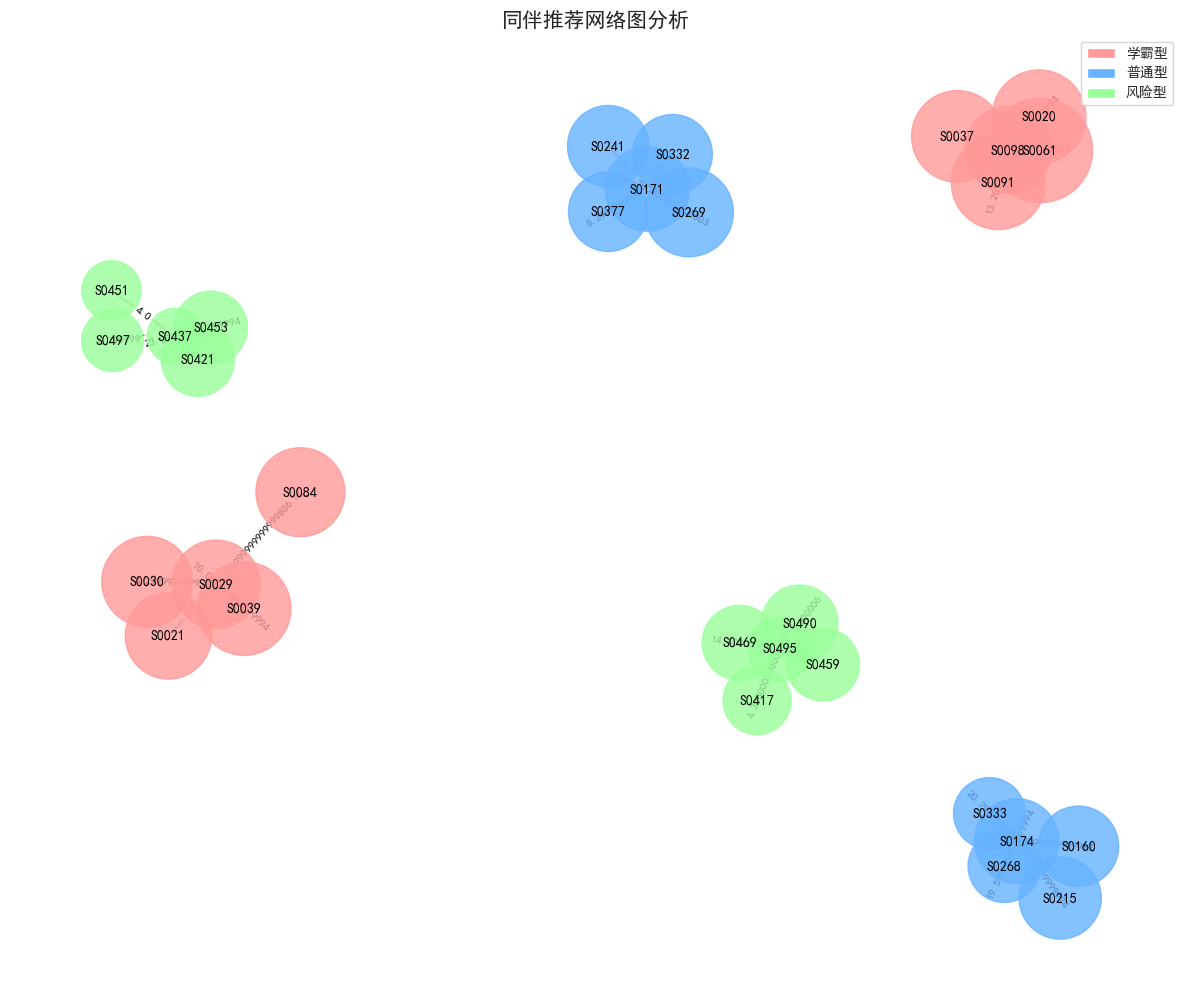


üìä ÁΩëÁªúÁâπÊÄßÂàÜÊûê:
ËäÇÁÇπÊï∞: 30
ËæπÊï∞: 24
Âπ≥ÂùáÊØè‰∏™Â≠¶ÁîüÁöÑÊé®ËçêËøûÊé•Êï∞: 1.60
ÁΩëÁªúËÅöÁ±ªÁ≥ªÊï∞: 0.00

ÈÄâ‰∏≠ÁöÑÂ≠¶ÁîüÂèäÂÖ∂Êé®ËçêËµÑÊ∫ê:
Â≠¶ÁîüID: S0029
Á±ªÂûã: Â≠¶Èú∏Âûã, ÊàêÁª©: 80.9
Êé®ËçêËµÑÊ∫ê: Â≠¶‰π†Â∞èÁªÑ
Êé®ËçêÂêå‰º¥: ['S0021', 'S0030', 'S0084', 'S0039']
--------------------------------------------------
Â≠¶ÁîüID: S0098
Á±ªÂûã: Â≠¶Èú∏Âûã, ÊàêÁª©: 78.7
Êé®ËçêËµÑÊ∫ê: Â≠¶‰π†Â∞èÁªÑ
Êé®ËçêÂêå‰º¥: ['S0091', 'S0037', 'S0061', 'S0020']
--------------------------------------------------
Â≠¶ÁîüID: S0171
Á±ªÂûã: ÊôÆÈÄöÂûã, ÊàêÁª©: 74.1
Êé®ËçêËµÑÊ∫ê: Â≠¶‰π†Â∞èÁªÑ
Êé®ËçêÂêå‰º¥: ['S0377', 'S0269', 'S0332', 'S0241']
--------------------------------------------------
Â≠¶ÁîüID: S0174
Á±ªÂûã: ÊôÆÈÄöÂûã, ÊàêÁª©: 74.3
Êé®ËçêËµÑÊ∫ê: Â≠¶‰π†Â∞èÁªÑ
Êé®ËçêÂêå‰º¥: ['S0268', 'S0160', 'S0215', 'S0333']
--------------------------------------------------
Â≠¶ÁîüID: S0437
Á±ªÂûã: È£éÈô©Âûã, ÊàêÁª©: 32.7
Êé®ËçêËµÑÊ∫ê: ËßÜÈ¢ëËØæÁ®ã
Êé®ËçêÂêå‰º¥: ['S0497', 'S0451', 'S0421', 'S0453']
-----------

In [22]:


# ======================
# 10. ÁΩëÁªúÂõæÂàÜÊûêÂêå‰º¥Êé®ËçêÁ≥ªÁªü
# ======================
import networkx as nx
import random

def get_color_for_type(student_type):
    colors = {
        'Â≠¶Èú∏Âûã': '#FF9999', 'ÊôÆÈÄöÂûã': '#66B2FF', 'È£éÈô©Âûã': '#99FF99', 'ÂÖ∂‰ªñ': '#FFCC99'
    }
    return colors.get(student_type, colors['ÂÖ∂‰ªñ'])

def create_peer_recommendation_graph(df, student_types=['Â≠¶Èú∏Âûã', 'ÊôÆÈÄöÂûã', 'È£éÈô©Âûã'], samples_per_type=1):
    """
    ÂàõÂª∫Âêå‰º¥Êé®ËçêÁΩëÁªúÂõæ
    
    ÂèÇÊï∞:
    df: ÂåÖÂê´Êé®ËçêÁªìÊûúÁöÑÊï∞ÊçÆÊ°Ü
    student_types: Ë¶ÅÂåÖÂê´ÁöÑÂ≠¶ÁîüÁ±ªÂûãÂàóË°®
    samples_per_type: ÊØèÁßçÁ±ªÂûãÈöèÊú∫ÊäΩÂèñÁöÑÂ≠¶ÁîüÊï∞Èáè
    
    ËøîÂõû:
    G: ÁΩëÁªúÂõæÂØπË±°
    selected_students: Ë¢´ÈÄâ‰∏≠ÁöÑÂ≠¶Áîü‰ø°ÊÅØ
    """
    # Ëé∑ÂèñÊúÄÊñ∞ËÆ∞ÂΩï
    latest_records = get_latest_scores(df)
    
    # ‰∏∫ÊØèÁßçÂ≠¶ÁîüÁ±ªÂûãÈöèÊú∫ÈÄâÊã©Ê†∑Êú¨
    selected_students = []
    for st_type in student_types:
        type_students = latest_records[latest_records['student_type'] == st_type]
        if len(type_students) > 0:
            samples = type_students.sample(min(samples_per_type, len(type_students)))
            # Â∞ÜÊ†∑Êú¨ËΩ¨Êç¢‰∏∫Â≠óÂÖ∏Âπ∂Ê∑ªÂä†È¢úËâ≤‰ø°ÊÅØ
            for _, sample in samples.iterrows():
                sample_dict = sample.to_dict()
                sample_dict['color'] = get_color_for_type(sample['student_type'])
                selected_students.append(sample_dict)
    
    # ÂàõÂª∫ÁΩëÁªúÂõæ
    G = nx.Graph()
    
    # Ê∑ªÂä†ÈÄâ‰∏≠ÁöÑÂ≠¶Áîü‰Ωú‰∏∫ËäÇÁÇπ
    for student in selected_students:
        G.add_node(student['stu_id'], 
                   type=student['student_type'],
                   score=student['weekly_score'],
                   resource=student['recommended_resource'],
                   color=student['color'])
    
    # Ê∑ªÂä†ËæπÔºàÊé®ËçêÂÖ≥Á≥ªÔºâ
    for student in selected_students:
        stu_id = student['stu_id']
        # Ëé∑ÂèñËØ•Â≠¶ÁîüÁöÑÊé®ËçêÂêå‰º¥
        recommended_peers = df[df['stu_id'] == stu_id]['recommended_peers'].iloc[0]
        
        # Ê∑ªÂä†Êé®ËçêÁöÑÂêå‰º¥‰∏∫ËäÇÁÇπÔºàÂ¶ÇÊûú‰∏çÂ≠òÂú®Ôºâ
        for peer_id in recommended_peers:
            # Ê£ÄÊü•Âêå‰º¥ÊòØÂê¶Âú®ÊúÄÊñ∞ËÆ∞ÂΩï‰∏≠
            if peer_id in latest_records['stu_id'].values:
                peer_info = latest_records[latest_records['stu_id'] == peer_id].iloc[0].to_dict()
                # Á°Æ‰øùËäÇÁÇπÂ≠òÂú®
                if peer_id not in G:
                    # Á°Æ‰øùÂåÖÂê´ÊâÄÊúâÂøÖË¶ÅÁöÑÂ±ûÊÄß
                    peer_info['color'] = get_color_for_type(peer_info['student_type'])
                    G.add_node(peer_id, 
                               type=peer_info['student_type'],
                               score=peer_info['weekly_score'],
                               resource=peer_info['recommended_resource'],
                               color=peer_info['color'])
                
                # ËÆ°ÁÆóÊàêÁª©Â∑ÆÂºÇ‰Ωú‰∏∫ËæπÁöÑÊùÉÈáç
                score_diff = abs(student['weekly_score'] - peer_info['weekly_score'])
                
                # Ê∑ªÂä†Ëæπ
                G.add_edge(stu_id, peer_id, weight=score_diff)
    
    return G, selected_students

def plot_peer_recommendation_graph(G, selected_students, figsize=(12, 10), save_path='./data/visualization/KNN_Net_Recommend.png'):
    """
    ÁªòÂà∂Âêå‰º¥Êé®ËçêÁΩëÁªúÂõæ
    
    ÂèÇÊï∞:
    G: ÁΩëÁªúÂõæÂØπË±°
    selected_students: Ë¢´ÈÄâ‰∏≠ÁöÑÂ≠¶Áîü‰ø°ÊÅØ
    figsize: ÂõæË°®Â§ßÂ∞è
    save_path: ÂõæÁâá‰øùÂ≠òË∑ØÂæÑÔºåËã•‰∏∫NoneÂàô‰∏ç‰øùÂ≠ò
    """
    plt.figure(figsize=figsize)
    pos = nx.spring_layout(G, k=0.3, iterations=50)
    
    node_colors = [G.nodes[node]['color'] for node in G.nodes()]
    node_sizes = [G.nodes[node]['score'] * 50 for node in G.nodes()]
    edge_widths = [10 / (d['weight'] + 1) for _, _, d in G.edges(data=True)]
    
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5, edge_color='gray')
    nx.draw_networkx_labels(G, pos, {node: node for node in G.nodes()}, font_size=10, font_family='SimHei')
    nx.draw_networkx_edge_labels(G, pos, {(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_size=8)
    
    from matplotlib.patches import Patch
    # Áõ¥Êé•‰ΩøÁî®get_color_for_typeÂáΩÊï∞ÂÜÖÈÉ®ÁöÑÈ¢úËâ≤Êò†Â∞Ñ
    color_map = {
        'Â≠¶Èú∏Âûã': '#FF9999',
        'ÊôÆÈÄöÂûã': '#66B2FF',
        'È£éÈô©Âûã': '#99FF99',
        'ÂÖ∂‰ªñ': '#FFCC99'
    }
    legend_elements = [Patch(facecolor=color, label=type_) 
                       for type_, color in color_map.items() if type_ != 'ÂÖ∂‰ªñ']
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.title('Âêå‰º¥Êé®ËçêÁΩëÁªúÂõæÂàÜÊûê', fontsize=15)
    plt.axis('off')
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"ÁΩëÁªúÂõæÂ∑≤‰øùÂ≠òËá≥: {save_path}")
    
    plt.show()

def show_network_recommendations(df, student_types=['Â≠¶Èú∏Âûã', 'ÊôÆÈÄöÂûã', 'È£éÈô©Âûã'], samples_per_type=1):
    print("üåê Âêå‰º¥Êé®ËçêÁΩëÁªúÂõæÂàÜÊûê")
    print("="*50)
    G, selected_students = create_peer_recommendation_graph(df, student_types, samples_per_type)
    plot_peer_recommendation_graph(G, selected_students, save_path='./data/visualization/KNN_Net_Recommend.png')  # ‰øùÂ≠òË∑ØÂæÑÁ§∫‰æã
    
    print("\nüìä ÁΩëÁªúÁâπÊÄßÂàÜÊûê:")
    print(f"ËäÇÁÇπÊï∞: {G.number_of_nodes()}")
    print(f"ËæπÊï∞: {G.number_of_edges()}")
    degrees = dict(G.degree())
    avg_degree = sum(degrees.values()) / len(degrees) if degrees else 0
    print(f"Âπ≥ÂùáÊØè‰∏™Â≠¶ÁîüÁöÑÊé®ËçêËøûÊé•Êï∞: {avg_degree:.2f}")
    clustering = nx.average_clustering(G) if G.number_of_nodes() >= 3 else 0
    print(f"ÁΩëÁªúËÅöÁ±ªÁ≥ªÊï∞: {clustering:.2f}")
    
    # ÊâìÂç∞ÈÄâ‰∏≠Â≠¶ÁîüÂèäÂÖ∂Êé®ËçêËµÑÊ∫ê
    print("\nÈÄâ‰∏≠ÁöÑÂ≠¶ÁîüÂèäÂÖ∂Êé®ËçêËµÑÊ∫ê:")
    print("="*50)
    for student in selected_students:
        print(f"Â≠¶ÁîüID: {student['stu_id']}")
        print(f"Á±ªÂûã: {student['student_type']}, ÊàêÁª©: {student['weekly_score']:.1f}")
        print(f"Êé®ËçêËµÑÊ∫ê: {student['recommended_resource']}")
        print(f"Êé®ËçêÂêå‰º¥: {student['recommended_peers']}")
        print("-"*50)

# ======================
# ÊâßË°åÊµÅÁ®ã
# ======================
# 1. Â∫îÁî®SVDÊé®Ëçê
df = apply_svd_recommendation(df)
# 2. Â∫îÁî®KNNÊé®Ëçê
df = improved_knn_recommendation(df)
# 3. Â±ïÁ§∫ÁΩëÁªúÂõæÊé®ËçêÔºàÂåÖÂê´ÊâìÂç∞ÂàÜÊûêÁªìÊûúÔºâ
show_network_recommendations(df, samples_per_type=2)  # Âª∫ËÆÆÊäΩÂèñ2‰∏™‰ª•‰∏äÊ†∑Êú¨‰ª•Â¢ûÂä†ËøûÊé•Ê¶ÇÁéá